### Student Information
Name: 黃若晴

Student ID: 111703064 NCCU

GitHub ID: sunnyrch

---

# Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [209]:
### Begin Assignment Here

## set up ## 

In [3]:
%pip install PAMI



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.utils import Bunch
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap


[nltk_data] Downloading package punkt to /Users/huang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [7]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/huang/Desktop/data-mining/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


## 2. data preparation

In [8]:
# categories
categories = ['neutral', 'positive', 'negative']

train = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
train = train[['label', 'text']]

sentiment_train = Bunch(data = train["text"].tolist(),       
    target = train["label"].astype(int).tolist(),  
    target_names = ['neutral', 'positive', 'negative'], 
    categories = categories)


In [9]:
sentiment_train.data[0:3]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.',
 'Seeing lots of red in the ticker.']

In [10]:
sentiment_train.target[0:10]

[-1, 0, 0, 1, -1, 0, -1, 0, 1, 1]

In [11]:
sentiment_train.target_names

['neutral', 'positive', 'negative']

In [12]:
len(sentiment_train.data)

847

In [13]:
print(sentiment_train.target_names[sentiment_train.target[0]])

negative


### >>> ex1 ###

In [14]:
#print out the text data for the first three sample
for i in range(3):
    print(f'example {i+1}:')
    print(sentiment_train.data[i])

example 1:
Calls on retards
example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3:
Seeing lots of red in the ticker.


## 3. data transformation

### 3.1 Converting Dictionary into Pandas Dataframe ###

In [15]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(sentiment_train), columns= ['text'])

In [16]:
len(X)

847

In [17]:
X[0:2]

text
0                                   Calls on retards
1  Stunt as in like why did they even make a big ...

In [18]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


In [19]:
# add category to the dataframe
X['category'] = sentiment_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, sentiment_train))

In [20]:
X[0:10]

text  category category_name
0                                   Calls on retards        -1      negative
1  Stunt as in like why did they even make a big ...         0       neutral
2                  Seeing lots of red in the ticker.         0       neutral
3  Vision Marine Technologies Inc. is rewriting t...         1      positive
4                           He didn’t say thank you.        -1      negative
5  Hoping to ejaculate in wet warm puss tonight, ...         0       neutral
6  Trump will respond to china increasing their t...        -1      negative
7  Confirmed not a trap. Its been like this for p...         0       neutral
8  Am I the only one seeing the cup & handle brea...         1      positive
9  HLGN is $10. Hurry and catch it now before it ...         1      positive

### 3.2 Familiarizing yourself with the Data ###

In [21]:
# a simple query
X[:10][["text","category_name"]]

text category_name
0                                   Calls on retards      negative
1  Stunt as in like why did they even make a big ...       neutral
2                  Seeing lots of red in the ticker.       neutral
3  Vision Marine Technologies Inc. is rewriting t...      positive
4                           He didn’t say thank you.      negative
5  Hoping to ejaculate in wet warm puss tonight, ...       neutral
6  Trump will respond to china increasing their t...      negative
7  Confirmed not a trap. Its been like this for p...       neutral
8  Am I the only one seeing the cup & handle brea...      positive
9  HLGN is $10. Hurry and catch it now before it ...      positive

In [23]:
# using loc (by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [24]:
# using iloc (by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### >>> ex2 ###

In [25]:
#Experiment with other querying techniques using pandas dataframes. 
X.query('category_name==["negative"]')[::3][:3]

text  category category_name
0                                    Calls on retards        -1      negative
12  Honestly let the economy burn, maybe people wi...        -1      negative
18                                     Trump and dump        -1      negative

### >>> ex3 ###

In [26]:
#fetch records belonging to the ```neutral``` category, and query every 10th record. Only show the first 5 records.
X[X["category_name"]=="neutral"][::10][:5]

text  category category_name
1   Stunt as in like why did they even make a big ...         0       neutral
22          Google "target dei".  I did it for you.           0       neutral
40  These China AI factory memes are pretty good. ...         0       neutral
55                                          The steal         0       neutral
72  A lot of stocks are down right now, and I'm th...         0       neutral

## 4. data mining using Pandas

### 4.1 missing value

In [27]:
# check missing values
X.isnull()

text  category  category_name
0    False     False          False
1    False     False          False
2    False     False          False
3    False     False          False
4    False     False          False
..     ...       ...            ...
842  False     False          False
843  False     False          False
844  False     False          False
845  False     False          False
846  False     False          False

[847 rows x 3 columns]

In [28]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

### >>> ex4 ###

In [29]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [30]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series

text        dummy_record
category               1
dtype: object

In [31]:
dummy_series.to_frame().T

text category
0  dummy_record        1

In [32]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

# check if the records was commited into result
len(result_with_series)

848

In [33]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record', 'category': 1}]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

848

In [34]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

In [35]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [36]:
len(X)

847

### >>> ex5 ###

In [37]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [38]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### 4.2 Dealing with Duplicate Data###

In [39]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [40]:
sum(X.duplicated())

23

In [41]:
sum(X.duplicated('text'))

23

## 5. data processing

### 5.1 Sampling ###

In [42]:
X_sample = X.sample(n=500) #random state

In [43]:
len(X_sample)

500

In [44]:
X_sample[0:4]

text  category category_name
483  It's insane, it's literally the single most st...        -1      negative
805                 $VXUS to answer your last question         0       neutral
632  I’m super into saunas and hate Russians, I thi...         0       neutral
620  Trump still has lots of cards. Mostly 2s and 7...        -1      negative

### >>> ex6 ###

In [45]:
print("X:")
for i in categories:
    cnt = len(X[X["category_name"]==i])
    percent = len(X[X["category_name"]==i])/len(X)
    print(f"{i}: {cnt}, percent:{percent: .2f}")

print("\nX_sample:")
for i in categories:
    cnt = len(X_sample[X_sample["category_name"]==i])
    percent = len(X_sample[X_sample["category_name"]==i])/len(X_sample)
    print(f"{i}: {cnt}, percent:{percent: .2f}")

print("\nalthough the size of simple dataset is smaller, the percentage of each category in X and X_sample is roughly same")  

X:
neutral: 423, percent: 0.50
positive: 109, percent: 0.13
negative: 315, percent: 0.37

X_sample:
neutral: 257, percent: 0.51
positive: 62, percent: 0.12
negative: 181, percent: 0.36

although the size of simple dataset is smaller, the percentage of each category in X and X_sample is roughly same


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
categories

['neutral', 'positive', 'negative']

category_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

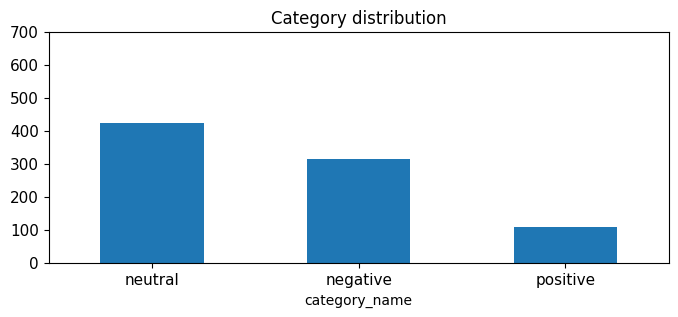

In [48]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
neutral     257
negative    181
positive     62
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

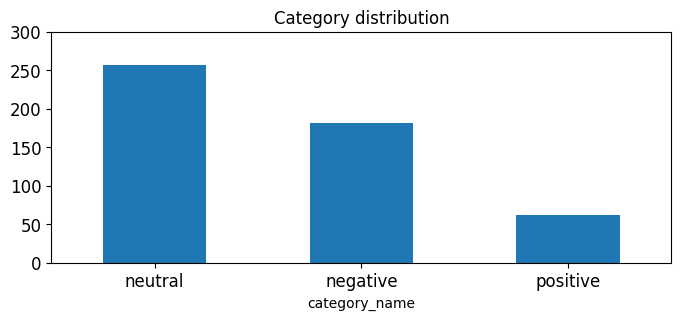

In [49]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

###  >>> ex7 ###

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

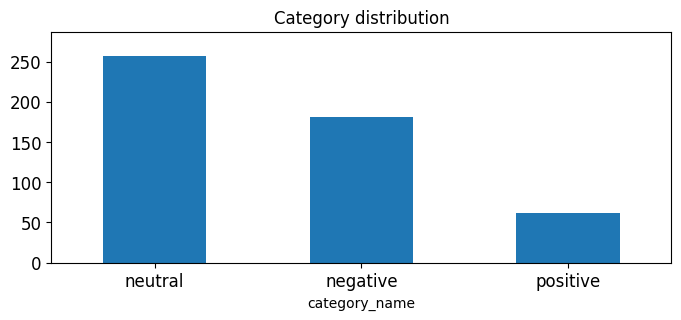

In [50]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> ex8 ###

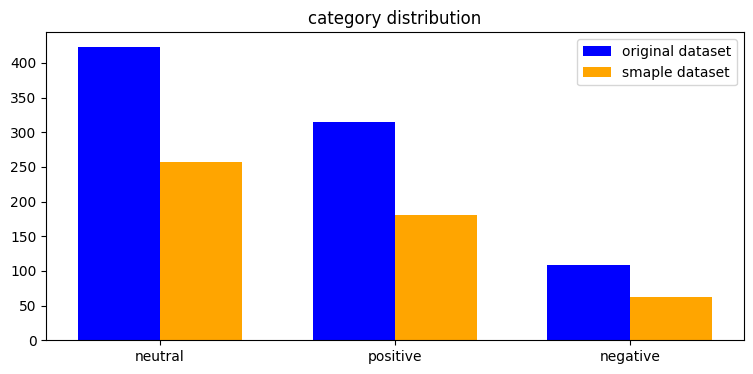

In [51]:
# Answer here
import numpy as np

plt.figure(figsize = (9,4))
x = np.arange(len(categories))
bar_width = 0.35

y_X = X.category_name.value_counts()
plt.bar(x, y_X, bar_width, label="original dataset", color="blue") 

y_sample = X_sample.category_name.value_counts()
plt.bar(x + bar_width, y_sample, bar_width, label="smaple dataset", color="orange") 

plt.xticks(x + bar_width/2, categories)
plt.title('category distribution')
plt.legend()


### 5.2 Feature Creation ###

In [52]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to /Users/huang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/huang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [53]:
X[0:3]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
Name: unigrams, dtype: object

In [54]:
X[0:3]

text  category category_name  \
0                                   Calls on retards        -1      negative   
1  Stunt as in like why did they even make a big ...         0       neutral   
2                  Seeing lots of red in the ticker.         0       neutral   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]

In [55]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection ###

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [57]:
count_vect.get_feature_names_out()[1488]

'fake'

In [58]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### >>> ex9 ###

In [59]:
#turn array[0] text document into a tokenized text using the build_analyzer()
analyze(X.text[0])

['calls', 'on', 'retards']

In [60]:
X_counts.shape

(847, 4346)

In [61]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [62]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [63]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### >>> ex10 ###

In [64]:
#get the first nonzero word in the fifth record
row5 = X_counts[4]

row5_nonzero = np.nonzero(row5)[1]
row5_nonzero_sort = np.sort(row5_nonzero)
count_vect.get_feature_names_out()[row5_nonzero_sort[0]]


'didn'

In [65]:
#get the second nonzero word in the fifth record
count_vect.get_feature_names_out()[row5_nonzero_sort[1]]

'he'

In [66]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [67]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]


In [68]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

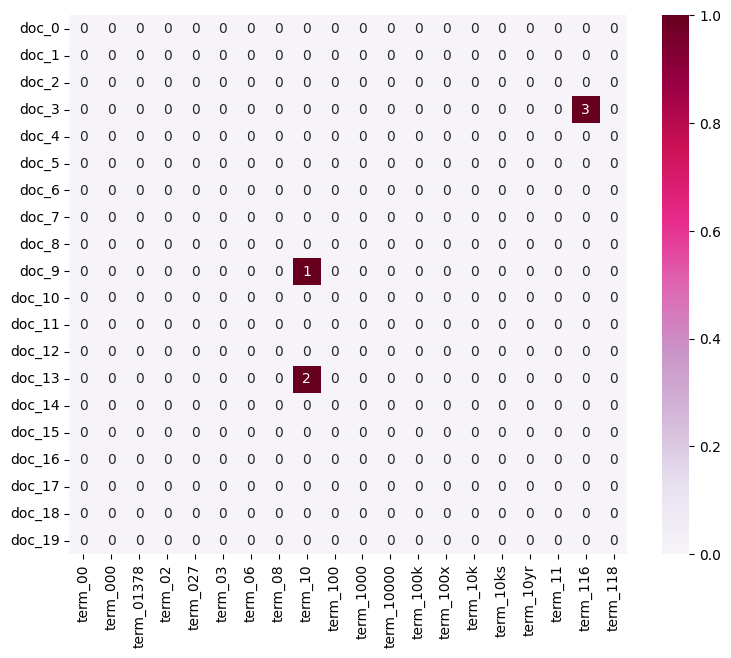

In [69]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> ex11 ###

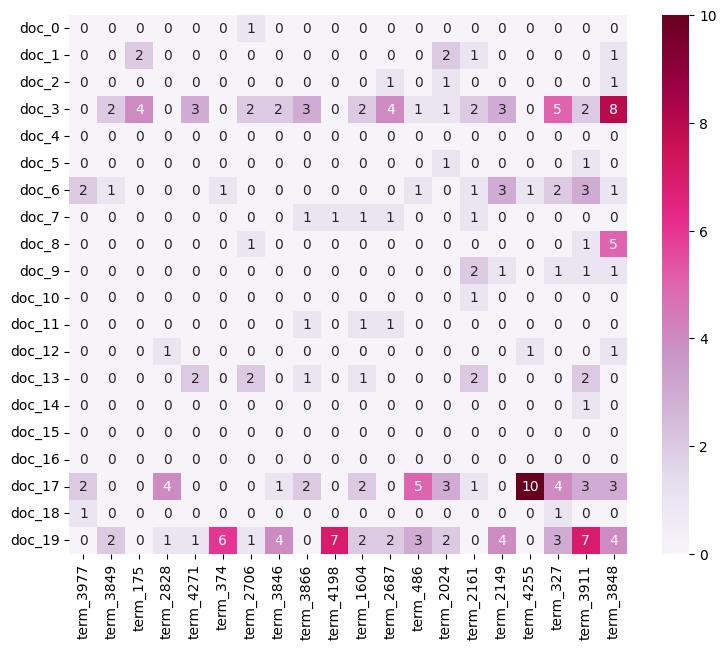

In [70]:
#for the first 20 documents, select 20 words that occur most frequency

#select first 20 documents
row = X_counts[:20]
#summing up the frequency of each word
row_sum = row.toarray().sum(axis=0)
#take the top 20 most frequency words
top_20 = np.argsort(row_sum)[-20:]

plot_x = ["term_"+str(i) for i in top_20]
plot_z = row[:, top_20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
max = df_todraw.max().max()

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=max, annot=True)

### 5.4 Attribute Transformation / Aggregation ###

In [71]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [72]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [73]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

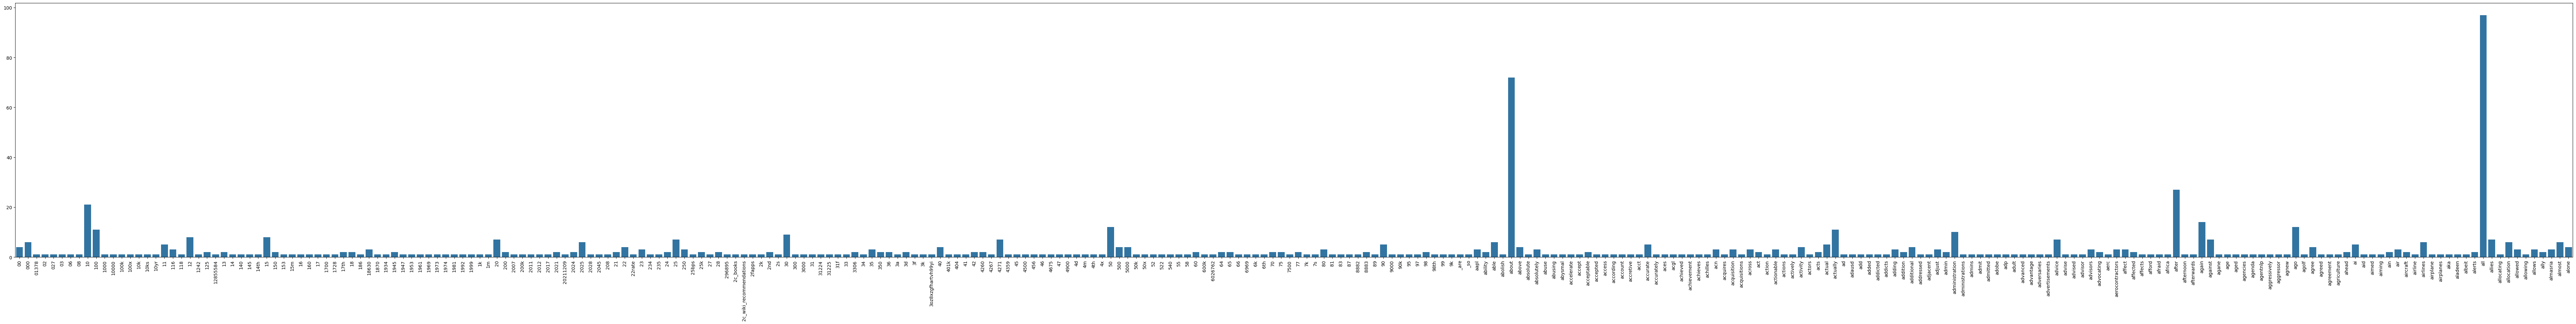

In [74]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> ex12 ###

In [75]:
# use plotly to get a nicer interactive visuliazation
import plotly.express as px

plot_x = count_vect.get_feature_names_out()[:300]
plot_y = term_frequencies[:300]

df_todraw = pd.DataFrame({"words" : plot_x, "frequency" : plot_y})

fig = px.bar(df_todraw, x = "words", y = "frequency")
fig.update_layout(width=1000, height=500)
fig.show()



### >>> ex13 ###

In [76]:
#reduce the words that frequency is smaller than 5
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_nonzero = np.where(term_frequencies[:300] >= 5)[0]

plot_x = count_vect.get_feature_names_out()[:300][term_frequencies_nonzero]
plot_y = term_frequencies[:300][term_frequencies_nonzero]

df_todraw = pd.DataFrame({"words" : plot_x, "frequency" : plot_y})
fig = px.bar(df_todraw, x = "words", y = "frequency")
fig.update_layout(width=1000, height=500)
fig.show()

### >>> ex14 ###

In [84]:
# sort the words based on their frequencies
words = count_vect.get_feature_names_out()
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

index = np.lexsort((words, -term_frequencies))
term_frequencies_sort = term_frequencies[index]
words_sort = words[index]

df_todraw = pd.DataFrame({"words" : words_sort, "frequency" : term_frequencies_sort})
fig = px.bar(df_todraw[:500], x = "words", y = "frequency")
fig.update_layout(width=1300, height=800)
fig.show()

In [85]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



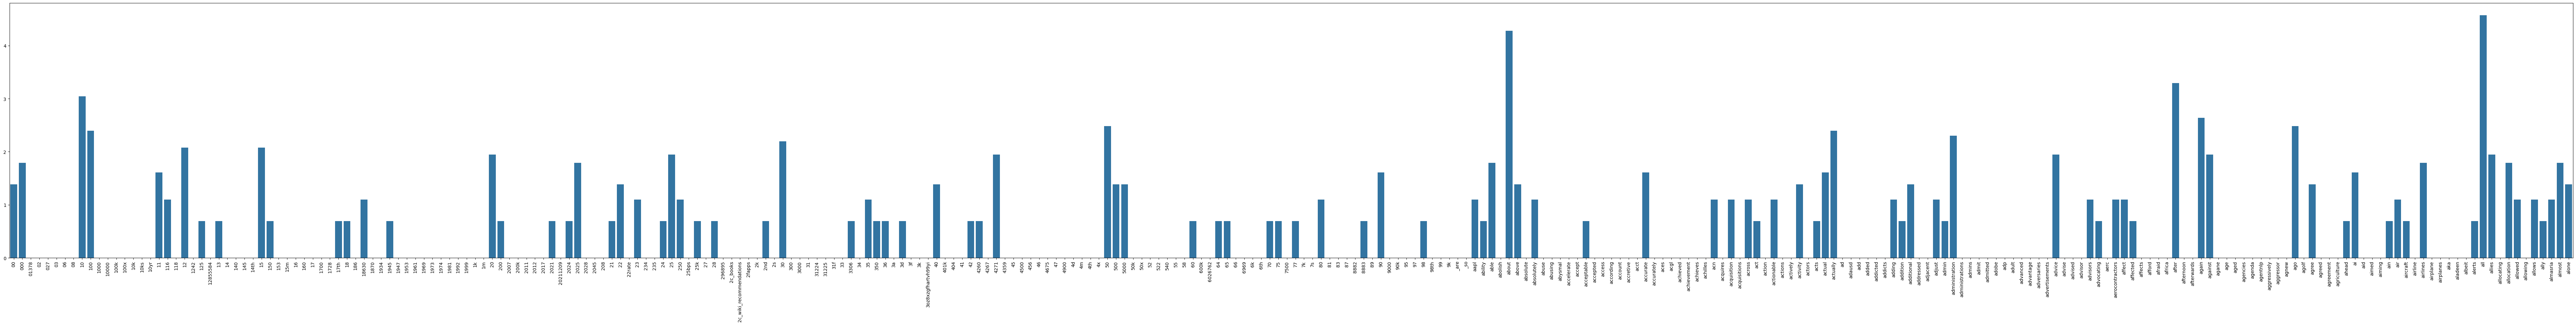

In [86]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> ex15 ###

In [87]:

words = count_vect.get_feature_names_out()
term_frequencies_log = np.asarray(term_frequencies_log)

index = np.lexsort((words, -term_frequencies_log))
term_frequencies_sort_log = term_frequencies_log[index]
words_sort = words[index]

df_todraw = pd.DataFrame({"words" : words_sort, "frequency" : term_frequencies_sort_log})
fig = px.bar(df_todraw[:500], x = "words", y = "frequency")
fig.update_layout(width=1300, height=800)
fig.show()

'''same as the master's data, after using log function, 
the frequency difference of high and low frequency words 
is reduced, also the up line of the bars is more flat'''

"same as the master's data, after using log function, \nthe frequency difference of high and low frequency words \nis reduced, also the up line of the bars is more flat"

## new data visualization ##

take the most frequent 30 words to visualize as circular barplot



In [88]:
df_todraw = pd.DataFrame({"words" : words_sort, "frequency" : term_frequencies_sort})
df_todraw = df_todraw[:30]

In [89]:
print(df_todraw)

     words  frequency
0      the        920
1       to        566
2      and        488
3       is        402
4       it        350
5       of        311
6       in        286
7     that        238
8      for        214
9     this        213
10     you        195
11      on        171
12     are        155
13    they        150
14      be        134
15      he        132
16    will        127
17    with        126
18      if        119
19      as        115
20  market        111
21     but        108
22     not        107
23      so        103
24     all         97
25    have         97
26      us         96
27    just         95
28     was         94
29      at         92


In [90]:
upperLimit = 150
lowerLimit = 30

max = df_todraw['frequency'].max()

#convert height
#convert the most frequency data to upperlimit(150)
slope = (upperLimit - lowerLimit) / max
heights = slope * df_todraw['frequency'] + lowerLimit
#print(heights[:30])

#compurt width
width = 2*np.pi / len(df_todraw.index)
#print(width*180/np.pi)

#compute the angle of each bar
indexes = list(range(1, len(df_todraw.index)+1))
angles = [element * width for element in indexes]

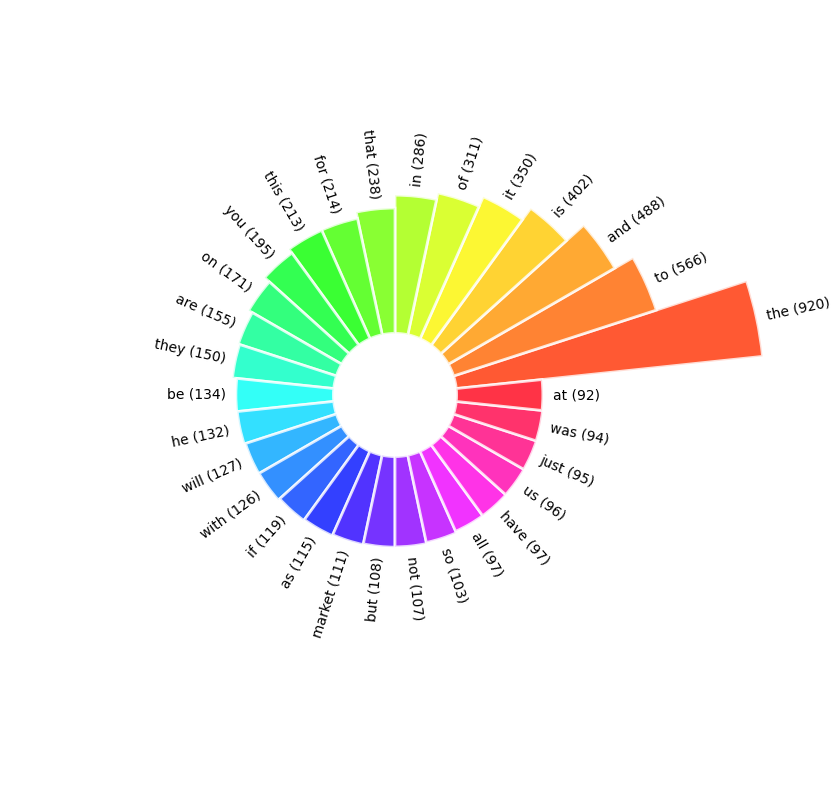

In [91]:
plt.figure(figsize=(20,10))

ax = plt.subplot(111, polar=True)

plt.axis('off')

# Draw bar
bars = ax.bar(
    x = angles, 
    height = heights, 
    width = width, 
    bottom = lowerLimit,
    linewidth = 2, 
    edgecolor = "white")

# Add label
for bar, angle, height, label, freq in zip(bars, angles, heights, df_todraw["words"], df_todraw['frequency']):

    #rotate label
    rotation = np.rad2deg(angle)

    # Flip some labels
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x = angle, 
        y = lowerLimit + bar.get_height() + 5, 
        s = label + " (" + str(freq) + ")", 
        ha = alignment, 
        va = 'center', 
        rotation = rotation, 
        rotation_mode = "anchor") 

#color
for angle, bar in zip(angles, bars):
    bar.set_facecolor(plt.cm.hsv(math.degrees(angle)/360))
    bar.set_alpha(0.8)

plt.show()


# Phase 2

In [92]:
### Begin Assignment Here

## data processing

### 5.4 finding frequent patterns

In [93]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [94]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category neutral:


00  000  01378  027  08  10  100  100k  100x  10k  ...  you  young  your  \
0     0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
1     0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
2     0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
3     0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
4     0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
..   ..  ...    ...  ...  ..  ..  ...   ...   ...  ...  ...  ...    ...   ...   
418   0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
419   0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
420   0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
421   0    0      0    0   0   0    0     0     0    0  ...    0      0     0   
422   0    0      0    0   0   0    0     0     0    0  ...    0      0     0   

     yours  yourself  yoyo  yup  zgld  zone  zsil  
0        0         0     0    0     0     0     0  
1        0         0     0    0     0     0     0  
2        0         0     0    0     0     0     0  
3        0         0     0    0     0     0     0  
4        0         0     0    0     0     0     0  
..     ...       ...   ...  ...   ...   ...   ...  
418      0         0     0    0     0     0     0  
419      0         0     0    0     0     0     0  
420      0         0     0    0     0     0     0  
421      0         0     0    0     0     0     0  
422      0         0     0    0     0     0     0  

[423 rows x 2750 columns]

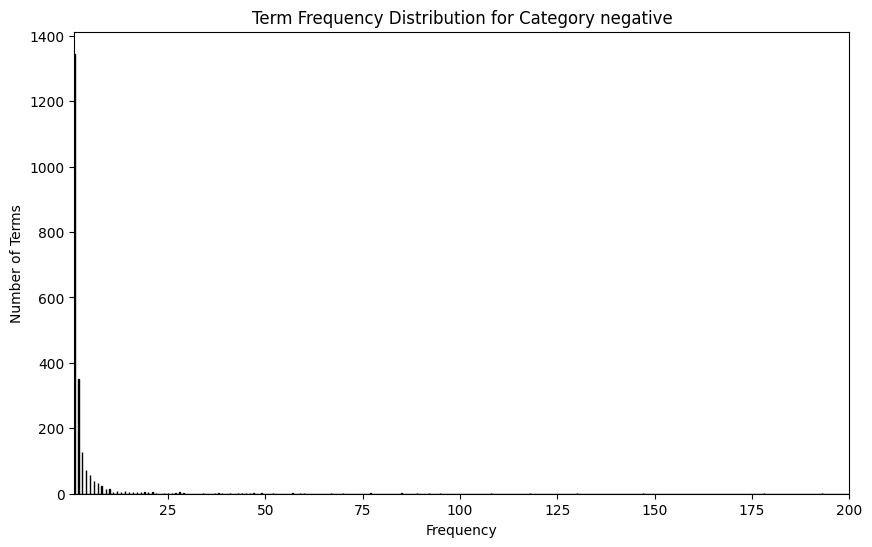

In [95]:
category_number=0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

#### the frequency of top 5% words

In [96]:
category_number=0 
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'or', 'about', 'even', 'no', 'people', 'there', 'like', 'market', 'my', 'more', 'him', 'them', 'think', 'going', 'now', 'money', 'one', 'would', 'how', 'make', 're', 'do', 'out', 'an', 'down', 'than', 'up', 'other', 'economy', 'from', 'tariffs', 'when', 'by', 'get', 'then', 'who', 'doing', 'over', 'some', 'trade', 'been', 'don', 'fuck', 'doesn', 'see', 'still', 'only', 'why', 'time', 'world', 'any', 'really', 'because', 'our', 'good', 'go', 'back', 'xi', 'point', 'american', 'wants', 'your', 'never', 'everyone', 'much', 'could', 'me', 'shit', 'literally', 'most', 'these', 'bad']


In [97]:
sorted_counts

array([409, 231, 193, ...,   1,   1,   1])

In [98]:
sorted_indices

array([1918, 1956,  137, ...,  960, 1705, 1095])

#### the frequency of the bottom 1% words

In [99]:
category_number=1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: neutral
Number of terms in bottom 1%: 27
Filtered terms: ['japan', 'msci', 'mpm', 'movies', 'moves', 'moved', 'mouth', 'mou', 'mornings', 'momentum', 'moderators', 'models', 'moar', 'mission', 'multi', 'missing', 'minutes', 'miners', 'mineral', 'minds', 'milk', 'mik', 'midcap', 'microstrategy', 'mic', 'mgmt', 'metals']


In [100]:
sorted_counts

array([  1,   1,   1, ..., 209, 267, 396])

In [101]:
sorted_indices

array([1374, 1625, 1623, ...,  213, 2466, 2425])

#### filter them out of the df

In [102]:
category_number=2 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category negative we filter the following words:
Bottom 1.0% words: 
knowing         1
shame           1
housing         1
sheet           1
shel            1
hour            1
hostility       1
hosed           1
horrible        1
hopefully       1
hope            1
hood            1
shell           1
honest          1
homelessness    1
shelves         1
home            1
holy            1
huh             1
humans          1
humphrey        1
dtype: int64
Top 5.0% words: 
bad           11
these         11
most          12
literally     12
shit          12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
japan            1
msci             1
mpm              1
movies           1
moves            1
moved            1
mouth            1
mou              1
mornings         1
momentum         1
moderators       1
models           1
moar

10  100  116  12  153  1728  18  1981  1992  20  ...  yeah  year  years  \
0     0    0    3   0    0     0   0     0     0   0  ...     0     0      1   
1     0    0    0   0    0     0   0     0     0   0  ...     0     0      0   
2     1    0    0   0    0     0   0     0     0   0  ...     0     0      0   
3     0    0    0   0    0     0   0     0     0   0  ...     0     0      0   
4     0    0    0   0    0     0   0     0     0   0  ...     0     0      0   
..   ..  ...  ...  ..  ...   ...  ..   ...   ...  ..  ...   ...   ...    ...   
104   0    0    0   0    0     0   0     0     0   0  ...     0     0      0   
105   0    0    0   0    0     0   0     0     0   0  ...     0     0      0   
106   0    0    0   0    0     0   0     0     0   0  ...     0     0      0   
107   0    0    0   0    0     0   0     0     0   0  ...     0     0      0   
108   0    0    0   0    0     0   0     0     0   0  ...     0     0      0   

     yelling  yes  yesterday  yields  yikes  your  zero  
0          0    0          0       0      0     1     0  
1          0    0          0       0      0     0     0  
2          0    0          0       0      0     0     0  
3          0    0          0       0      0     0     0  
4          0    0          0       0      0     0     0  
..       ...  ...        ...     ...    ...   ...   ...  
104        0    0          0       0      0     0     0  
105        0    0          0       0      0     0     0  
106        0    0          0       0      0     0     0  
107        0    0          0       0      0     0     0  
108        0    0          0       0      0     0     0  

[109 rows x 1103 columns]

### >>> ex 16
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [103]:
#difference:
#for the top 5% words with different category, the words are more relate to its category, ex: negative category have more negative words, such as bas, shit; positive category have more positive words, such as good, like.


#similar:
#for the top 5% words, they are mostly common words like "the", "is", "and", "to", "of", etc.
#for the bottom 1% words, they are mostly rare words.

#### computer graphics

In [104]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


In [105]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

File Not Found


NameError: name 'quit' is not defined

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606134
Sparsity : 0.9951214471923757


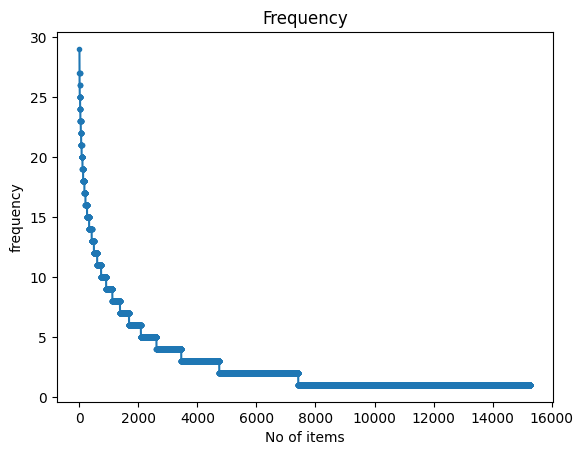

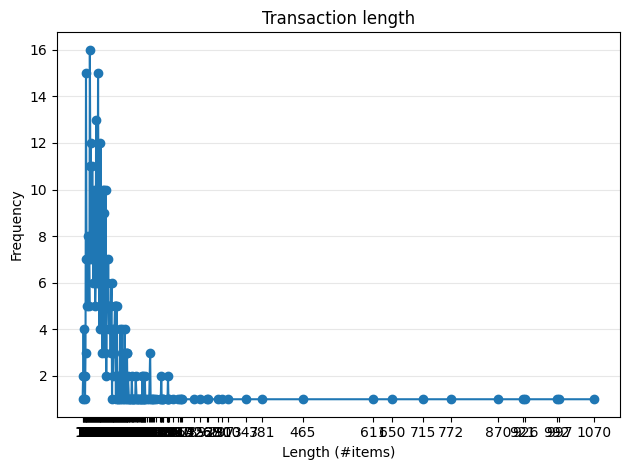

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()


Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


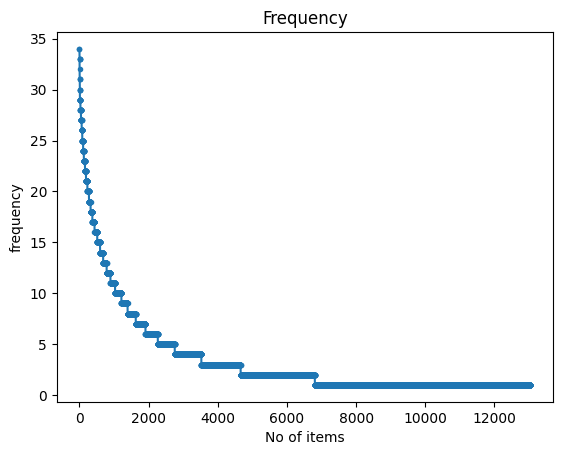

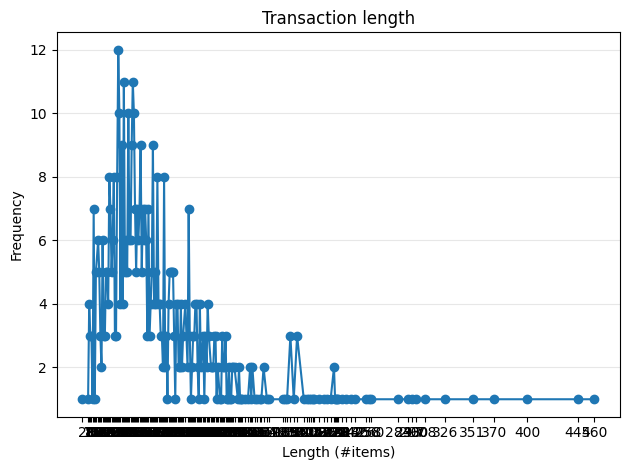

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


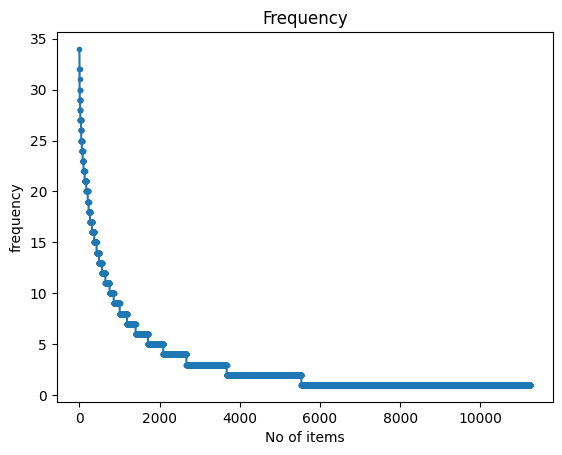

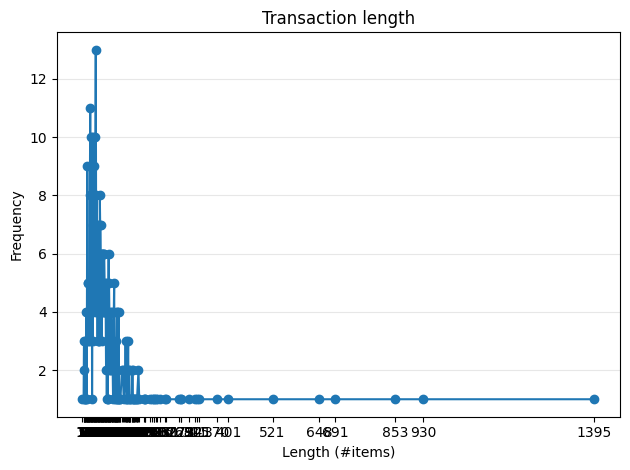

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

#### mining patterns

In [110]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 20
Runtime: 0.001458883285522461


In [112]:
obj1.save('freq_patterns_negative_minSup9.txt') #save the patterns
frequentPatternsDF_negative

Patterns  Support
0       end        9
1     right        9
2       off        9
3     seems        9
4      want        9
5      same        9
6      last        9
7   america        9
8      well        9
9      week        9
10     into        9
11    great        9
12   things       10
13     here       10
14      day       10
15     sure       10
16   should       10
17    again       10
18  already       11
19    after       11

In [113]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 19
Runtime: 0.0020132064819335938


In [114]:
obj2.save('freq_patterns_neutral_minSup9.txt') #save the patterns
frequentPatternsDF_neutral

Patterns  Support
0   looking        9
1      cash        9
2      said        9
3       got        9
4     every        9
5      news        9
6       way        9
7       own        9
8    reddit        9
9      long        9
10    still        9
11   weekly        9
12       ll        9
13       am        9
14      few        9
15     down       10
16     most       10
17       go       10
18     well       10

In [115]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0010099411010742188


In [116]:
obj3.save('freq_patterns_comp_positive_minSup9.txt') #save the patterns
frequentPatternsDF_positive

Empty DataFrame
Columns: [Patterns, Support]
Index: []

#### significantly improve the classification process

In [117]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns Support
18    after      11
17  already      11
11   things      10
35     most      10
34     down      10
16    again      10
15   should      10
14     sure      10
13      day      10
12     here      10
36       go      10
10    great       9
9      into       9
2       off       9
3     seems       9
33      few       9
32       am       9
31       ll       9
30   weekly       9
29    still       9
28     long       9
27   reddit       9
26      own       9
25      way       9
24     news       9
23    every       9
22      got       9
21     said       9
20     cash       9
19  looking       9
1     right       9
4      want       9
5      same       9
6      last       9
7   america       9
8      week       9
0       end       9
Number of patterns discarded: 2


In [118]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  01378  02  027  03  06  08  10  100  ...  said  cash  looking  \
0     0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
1     0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
2     0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
3     0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
4     0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...   ...   ...      ...   
842   0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
843   0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
844   0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
845   0    0      0   0    0   0   0   0   0    0  ...     0     0        0   
846   0    0      0   0    0   0   0   0   0    0  ...     0     0        0   

     right  want  same  last  america  week  end  
0        0     0     0     0        0     0    0  
1        0     0     0     0        0     0    0  
2        0     0     0     0        0     0    0  
3        0     0     0     0        0     0    0  
4        0     0     0     0        0     0    0  
..     ...   ...   ...   ...      ...   ...  ...  
842      0     0     0     0        0     0    0  
843      0     0     0     0        0     0    0  
844      0     0     0     0        0     0    0  
845      0     0     0     0        0     0    0  
846      0     0     0     0        0     0    0  

[847 rows x 4383 columns]

### >>> ex 17
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'negative' category in processed database.
For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well.

In [119]:
!pip install -U pami


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [120]:
from PAMI.frequentPattern.topk import FAE  as alg
from PAMI.frequentPattern.topk import FAE  as alg
import pandas as pd


In [121]:
# Answer Here

print("negative KCount = 500",'\n')

inputFile = './db_hw/td_freq_db_negative.csv'
kCount = 500  #Users can also specify this constraint between 0 to 1.
seperator = '\t'

obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

obj.save(outFile='fq_Patterns_CG_neg_KCount_500.txt')

fqPatternsDF_CG_K500= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(fqPatternsDF_CG_K500)))
print('Runtime: ' + str(obj.getRuntime()))

fqPatternsDF_CG_K500.head()


negative KCount = 500 

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.06827116012573242


Patterns  Support
0  already       11
1    after       11
2   things       10
3     here       10
4      day       10

In [122]:
# Answer Here

print("negative KCount = 400",'\n')

inputFile = './db_hw/td_freq_db_negative.csv'
kCount = 400  #Users can also specify this constraint between 0 to 1.
seperator = '\t'
obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
print(obj)
obj.mine()            #Start the mining process
obj.save(outFile='fq_Patterns_CG_neg_KCount_400.txt')
fqPatternsDF_CG_K400= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(fqPatternsDF_CG_K400)))
print('Runtime: ' + str(obj.getRuntime()))

fqPatternsDF_CG_K400.head()


negative KCount = 400 

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 400
Runtime: 0.050746917724609375


Patterns  Support
0  already       11
1    after       11
2   things       10
3     here       10
4      day       10

In [123]:
# Answer Here

print("negative KCount = 300",'\n')

inputFile = './db_hw/td_freq_db_negative.csv'
kCount = 300  #Users can also specify this constraint between 0 to 1.
seperator = '\t'

obj = alg.FAE(iFile=inputFile, k=kCount, sep=seperator)    #initialize
obj.mine()            #Start the mining process

obj.save(outFile='fq_Patterns_CG_neg_KCount_300.txt')

fqPatternsDF_CG_K300= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(fqPatternsDF_CG_K300)))
print('Runtime: ' + str(obj.getRuntime()))

fqPatternsDF_CG_K300.head()


negative KCount = 300 

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 300
Runtime: 0.01247406005859375


Patterns  Support
0  already       11
1    after       11
2   things       10
3     here       10
4      day       10

In [ ]:
inputFile = './db/td_freq_db_negative.csv'
seperator='\t'
minimumSupportCountList = [3, 6, 9]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FAE algorithm

algorithm = 'FAE'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.FAE(inputFile, k=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

print(result)


In [ ]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

In [ ]:
ab = plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

In [ ]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

#### Dimensionality Reduction

In [127]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [128]:
X_pca_tdm.shape

(847, 2)

In [129]:
X_tsne_tdm.shape

(847, 2)

In [130]:
X_umap_tdm.shape

(847, 2)

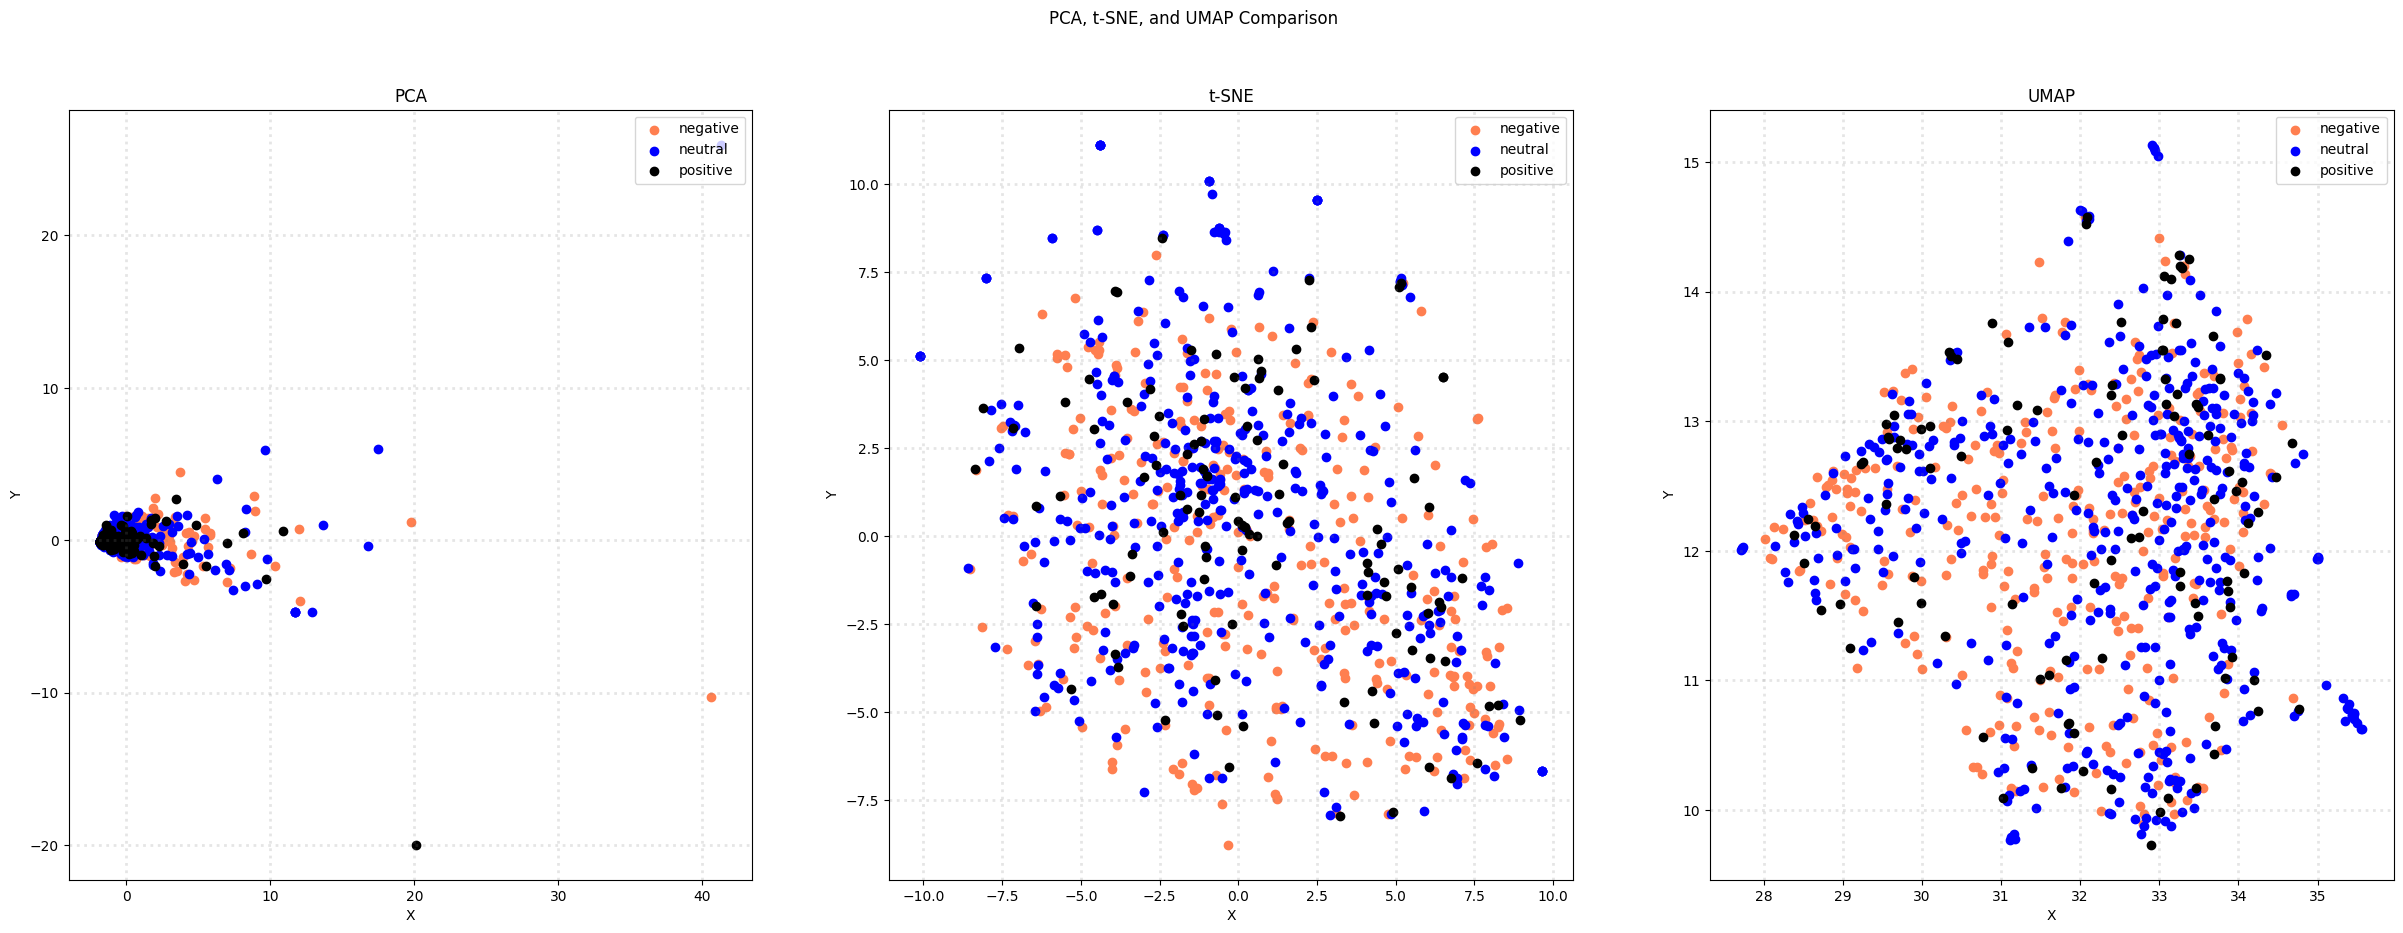

In [131]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

####  try in tandem with our pattern augmented data

In [132]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

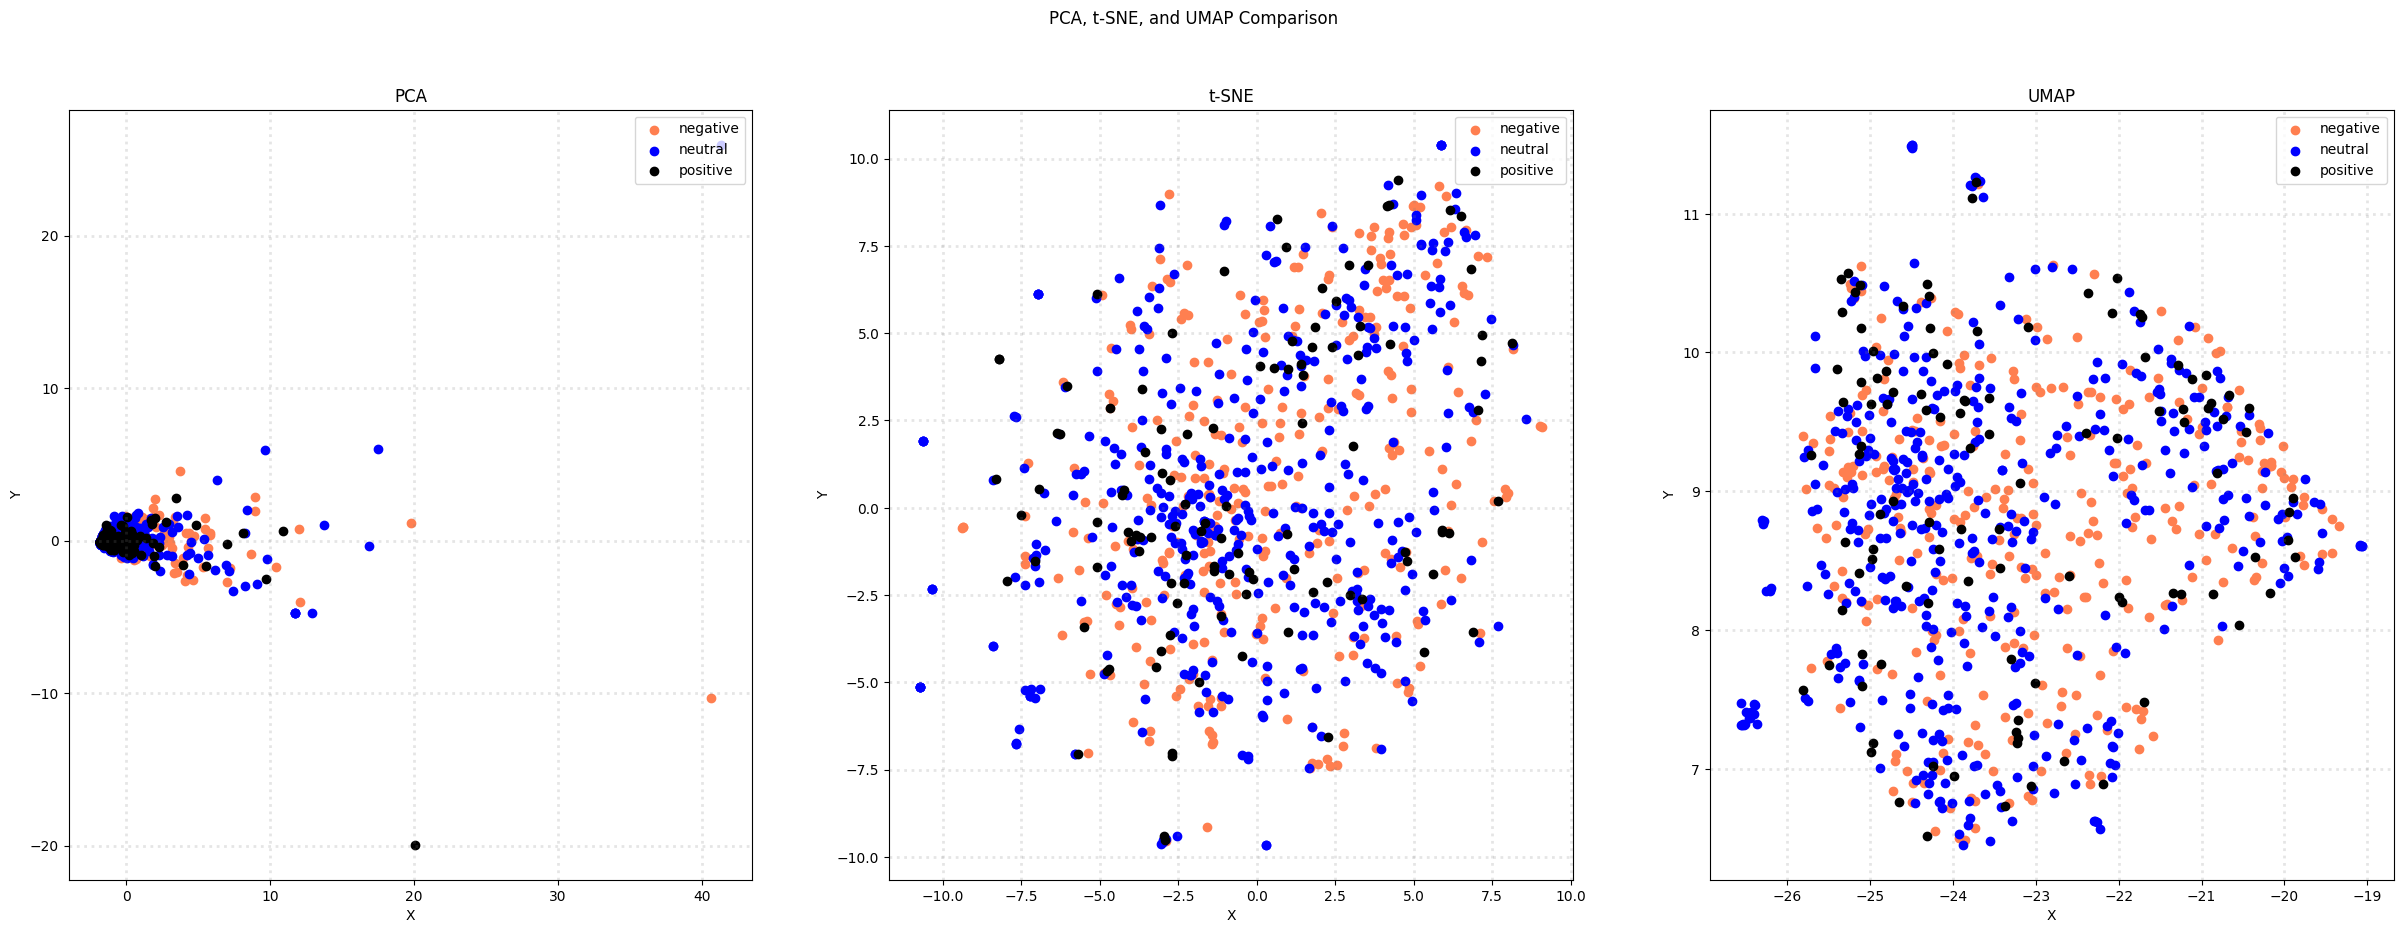

In [133]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> ex 18

In [134]:
#Answer Here
from mpl_toolkits.mplot3d import Axes3D 

In [135]:
X_pca_tdm_3 = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3 = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3 = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

In [136]:
X_pca_tdm_3.shape

(847, 3)

In [137]:
X_tsne_tdm_3.shape

(847, 3)

In [138]:
X_umap_tdm_3.shape

(847, 3)

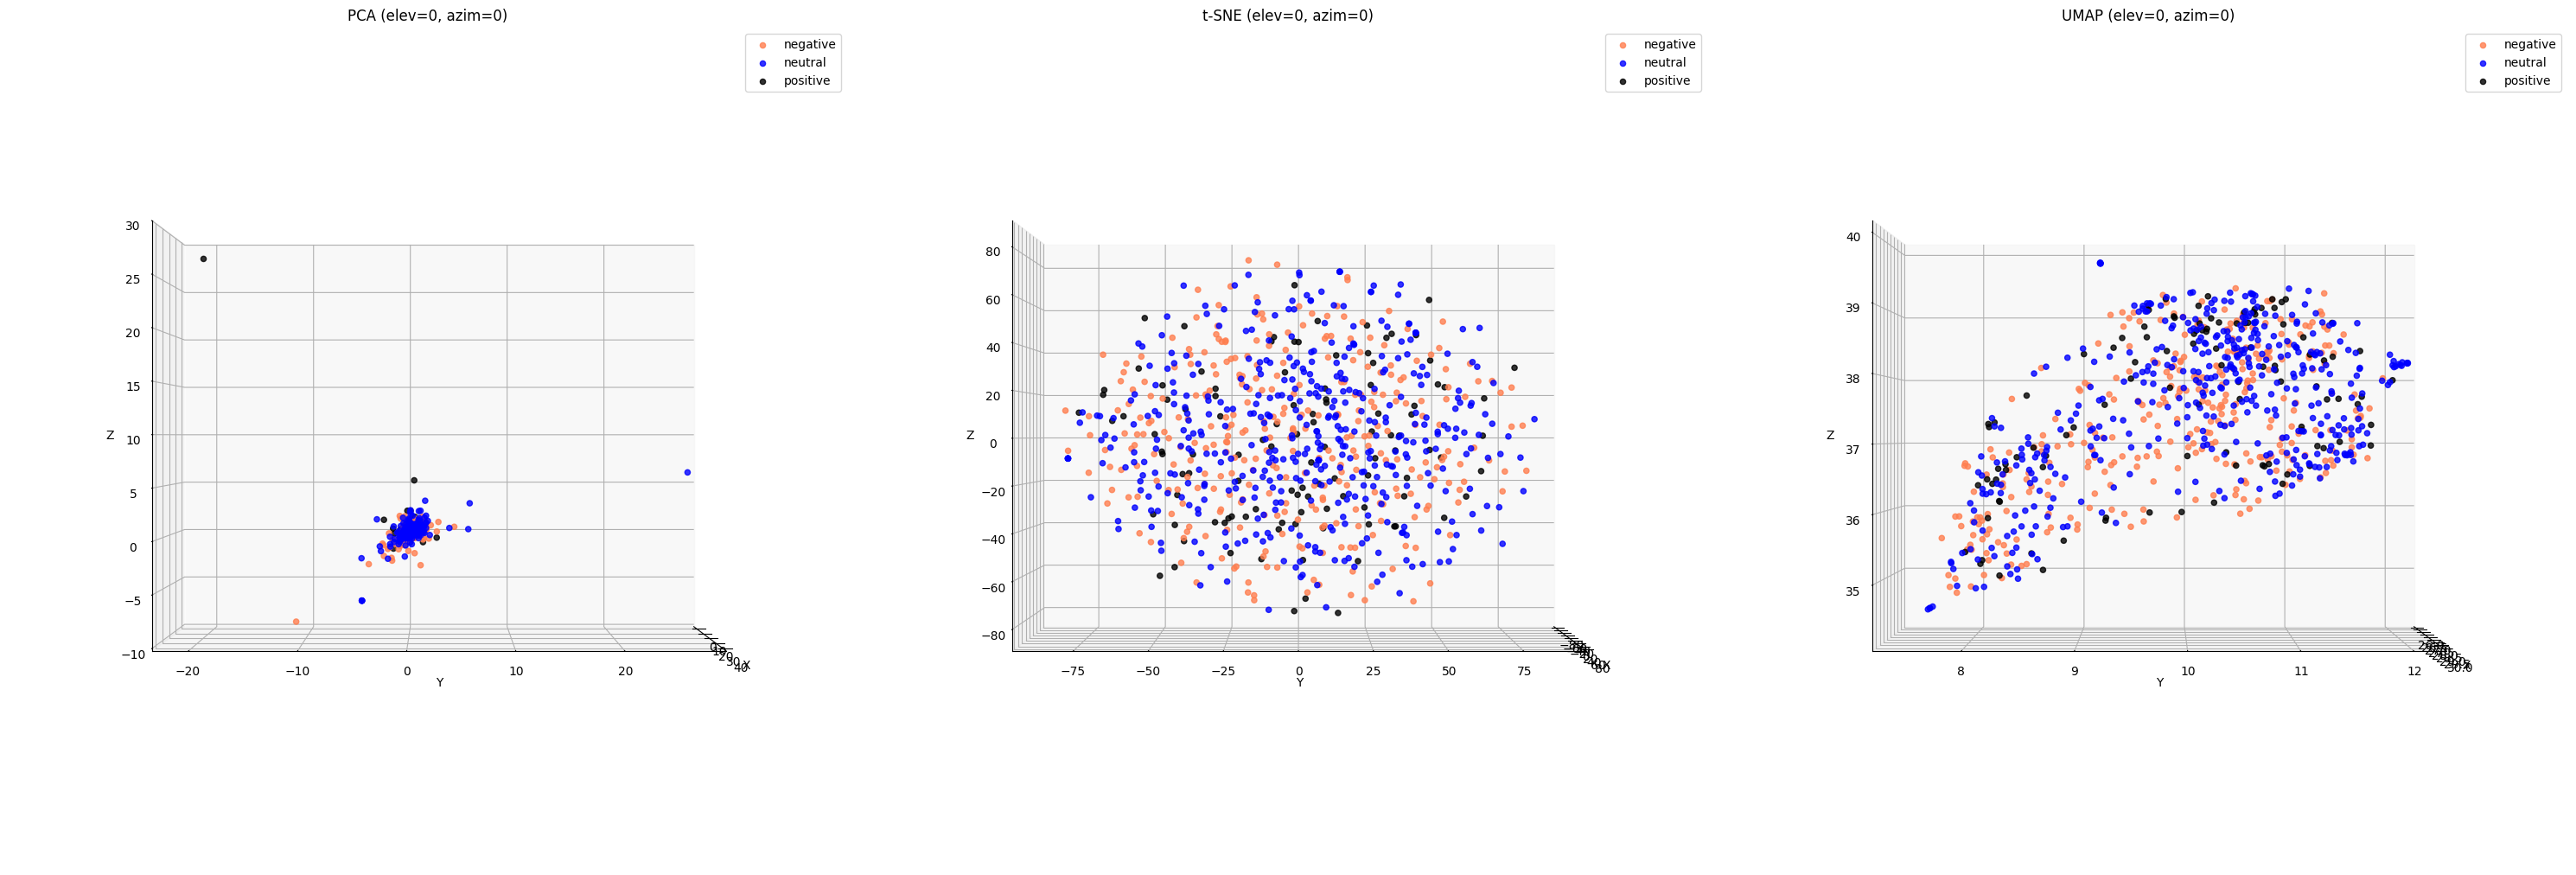

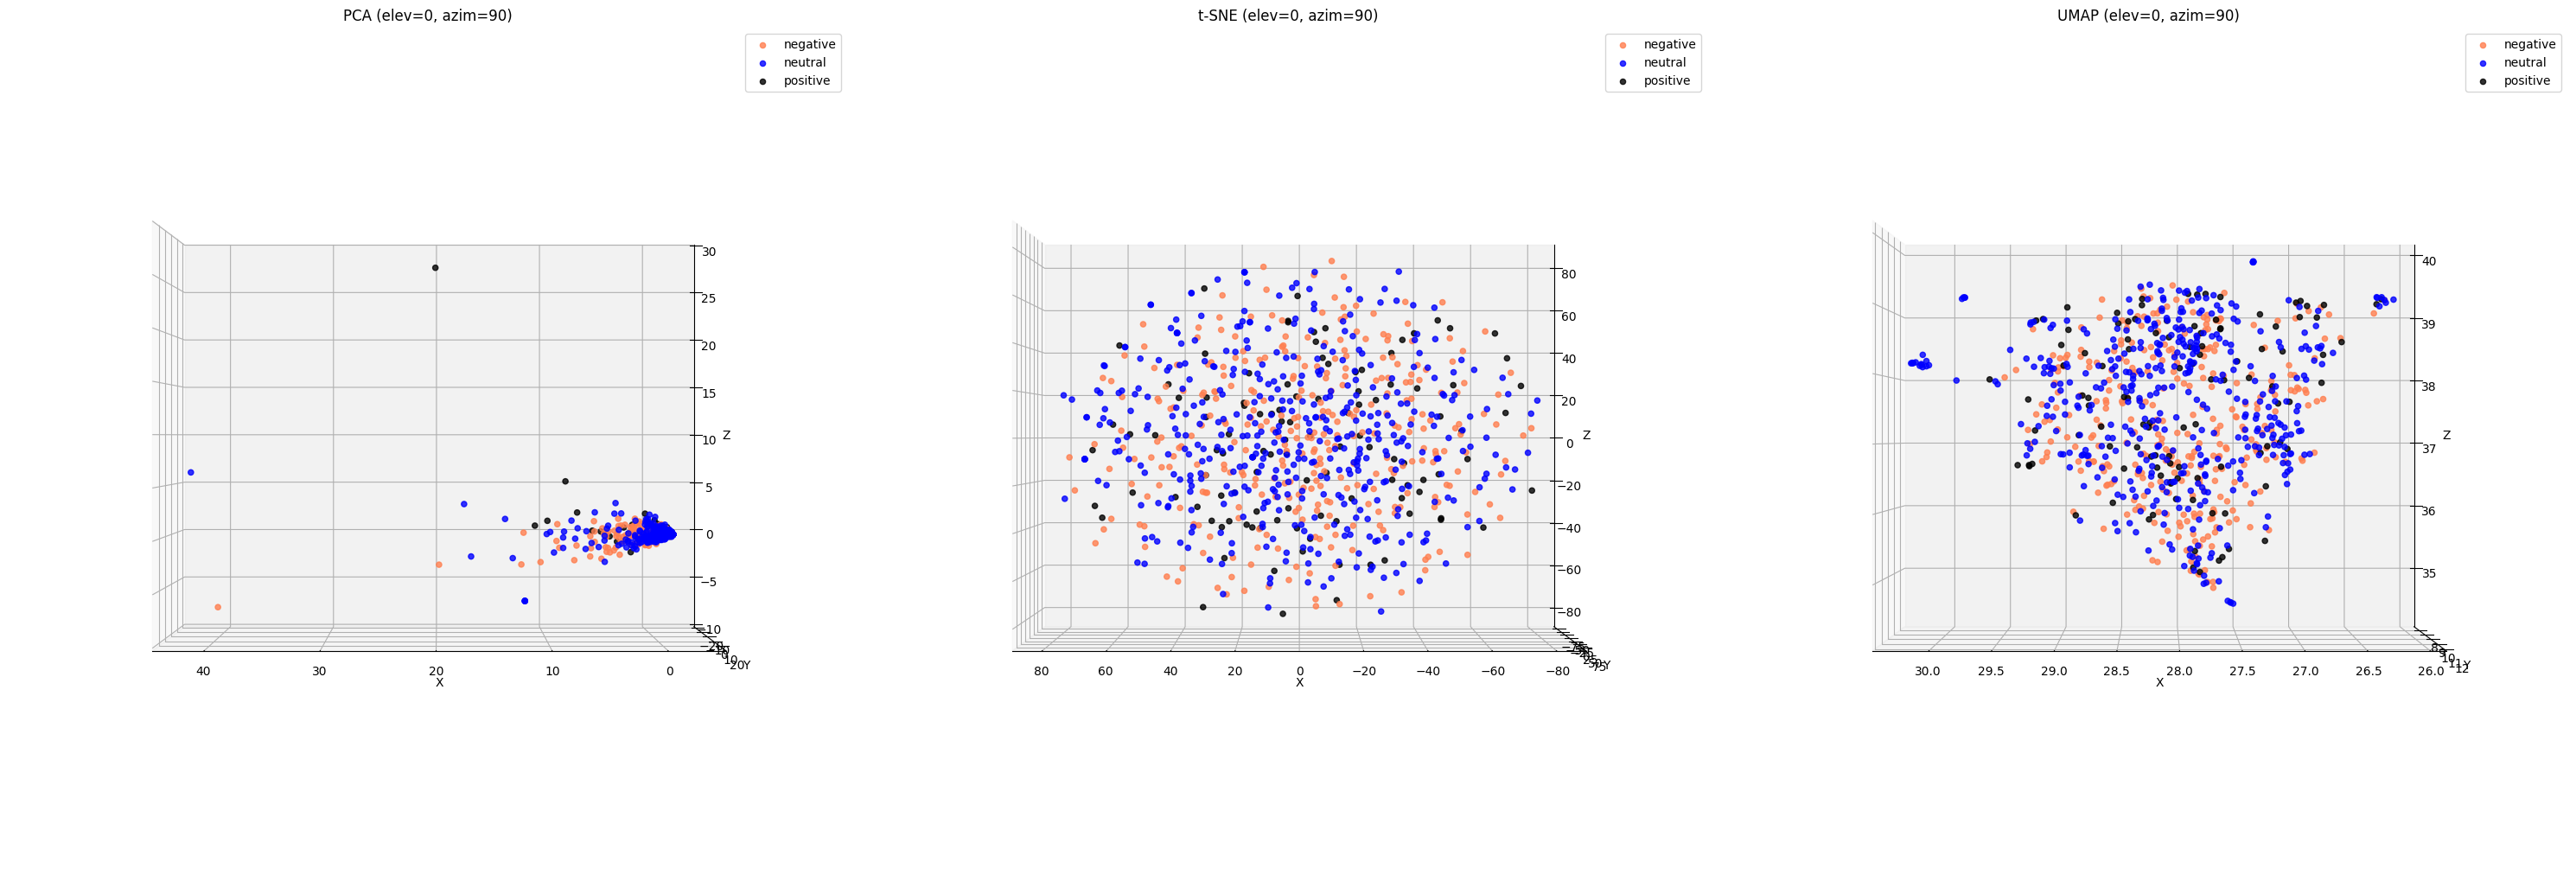

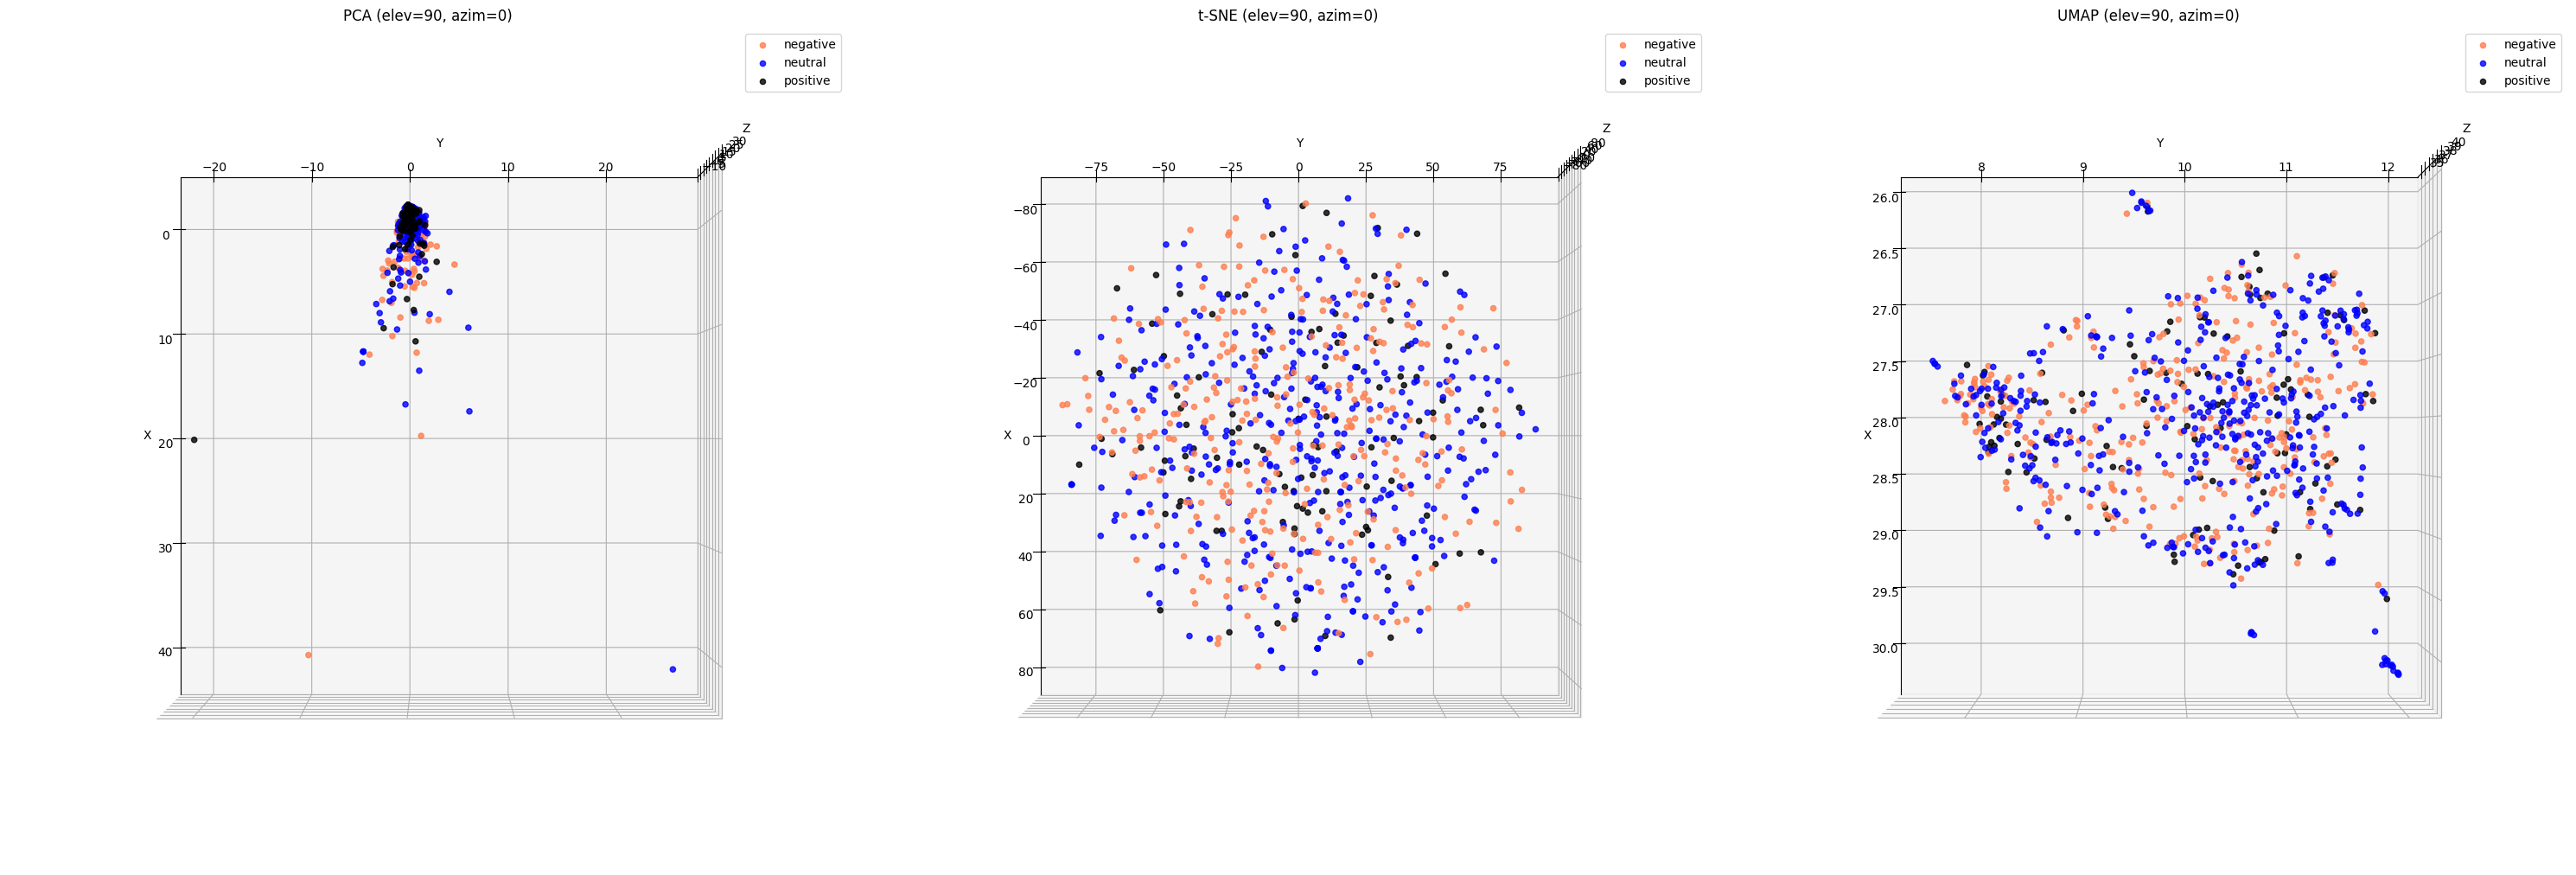

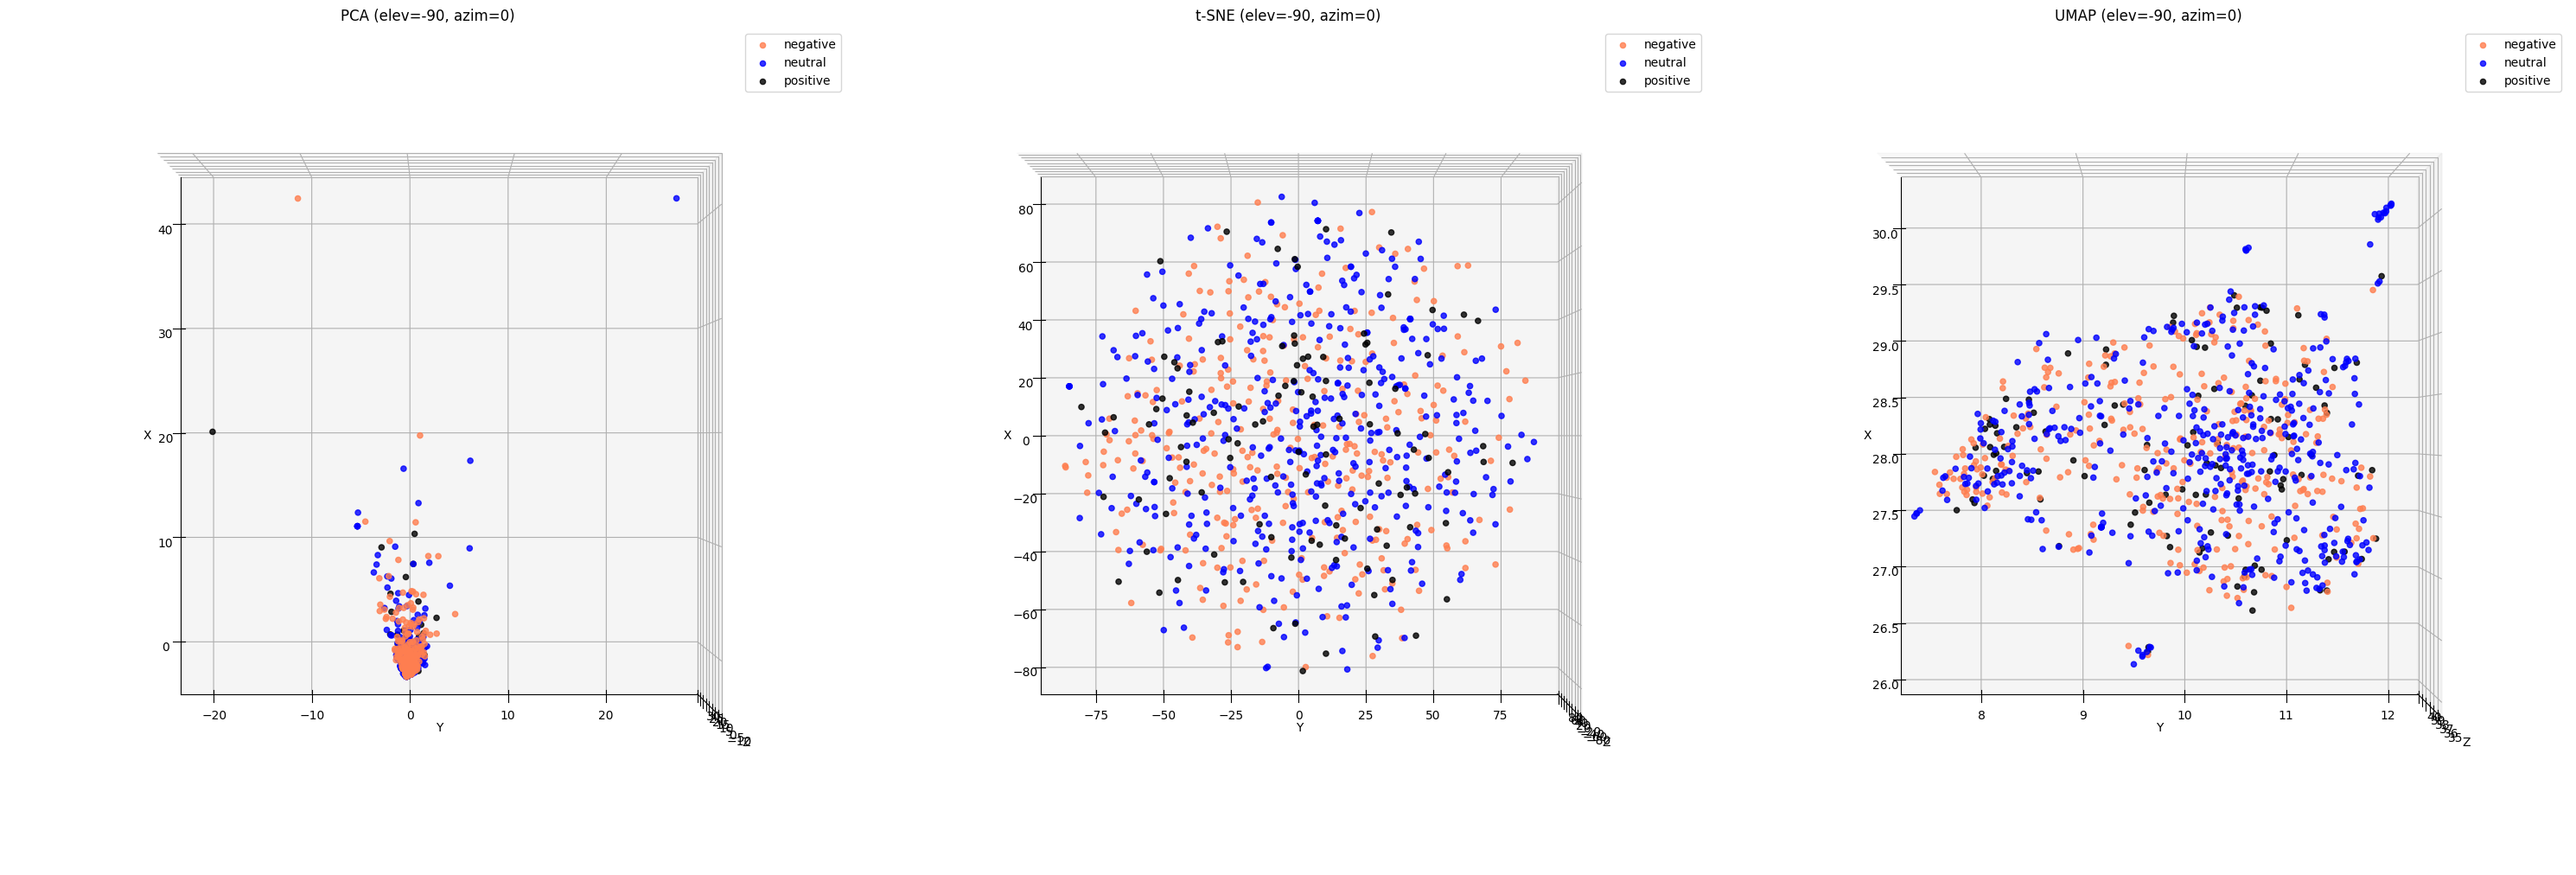

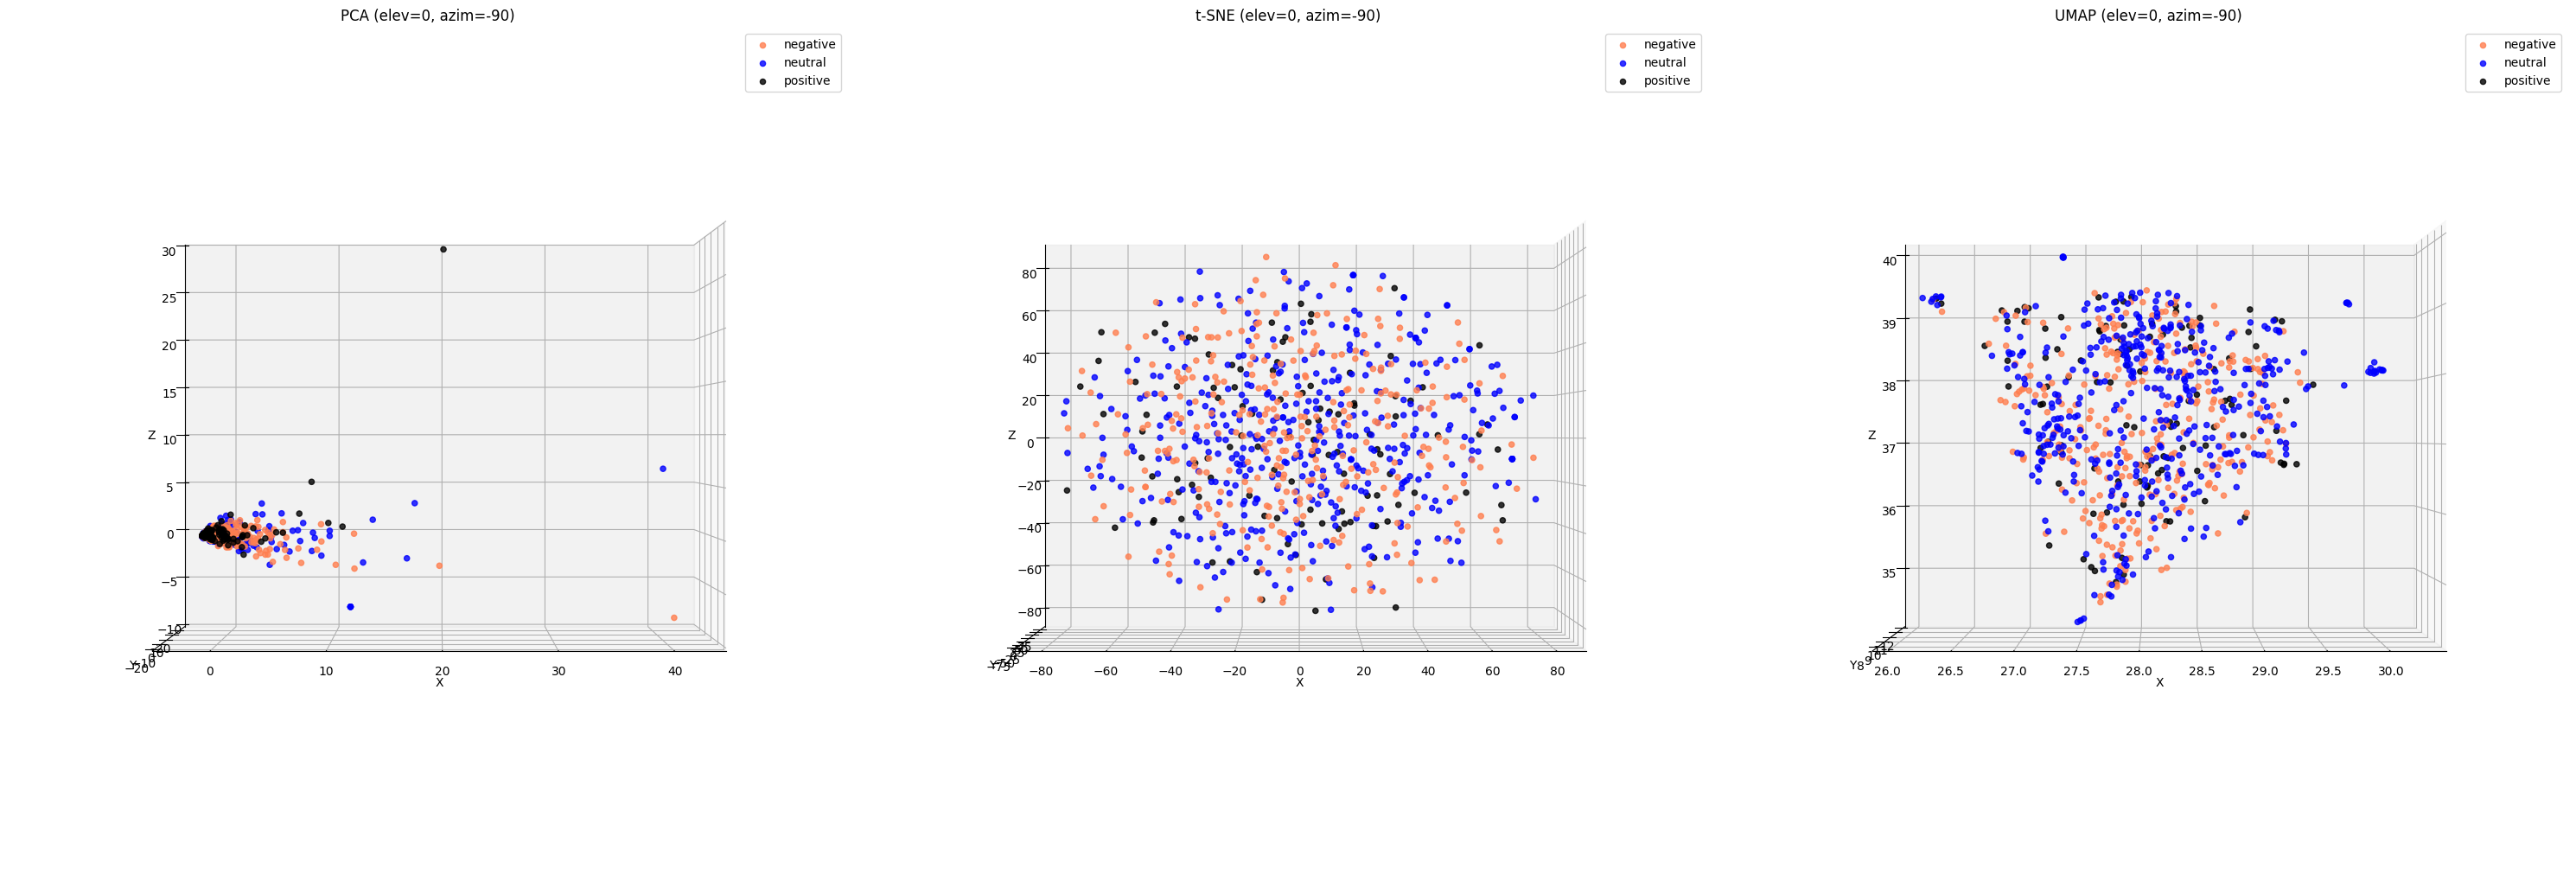

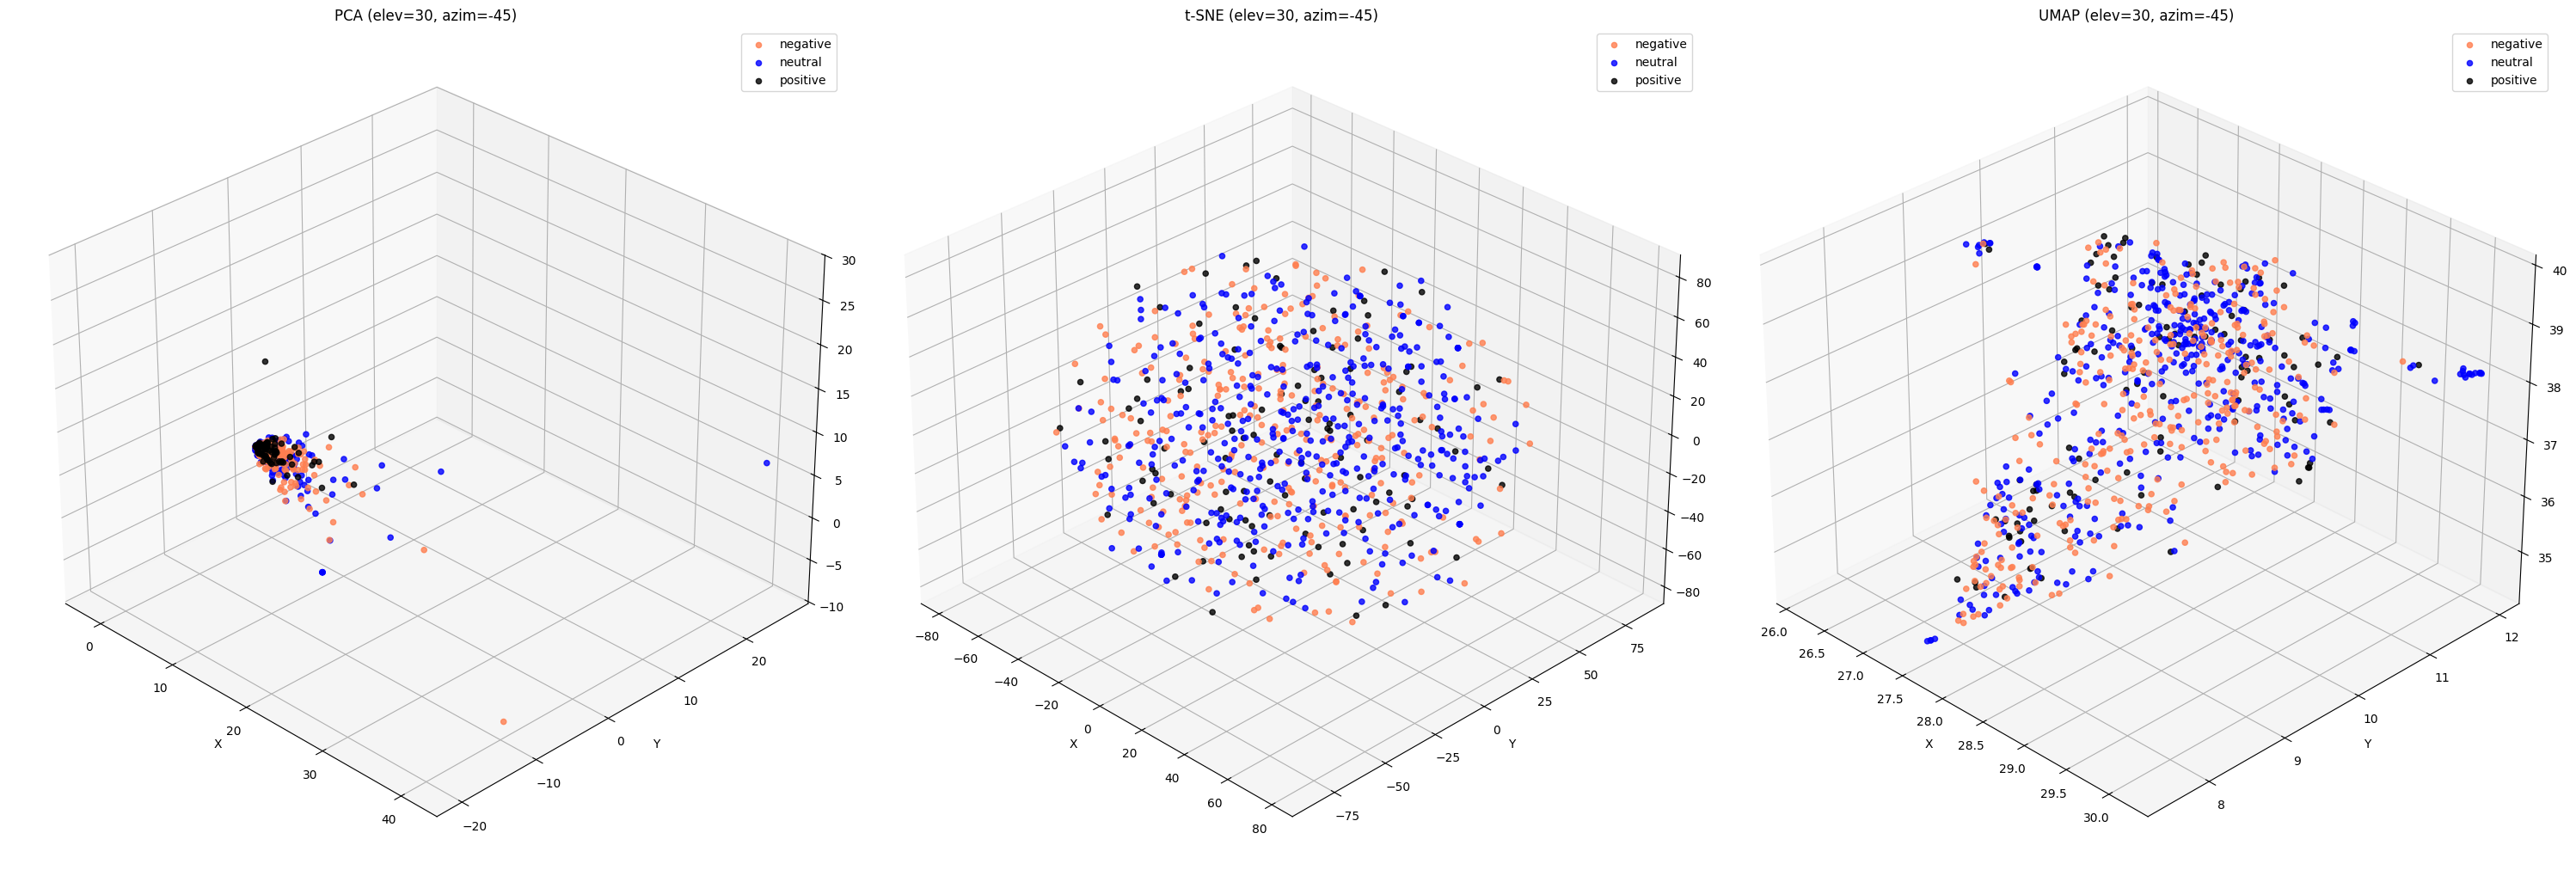

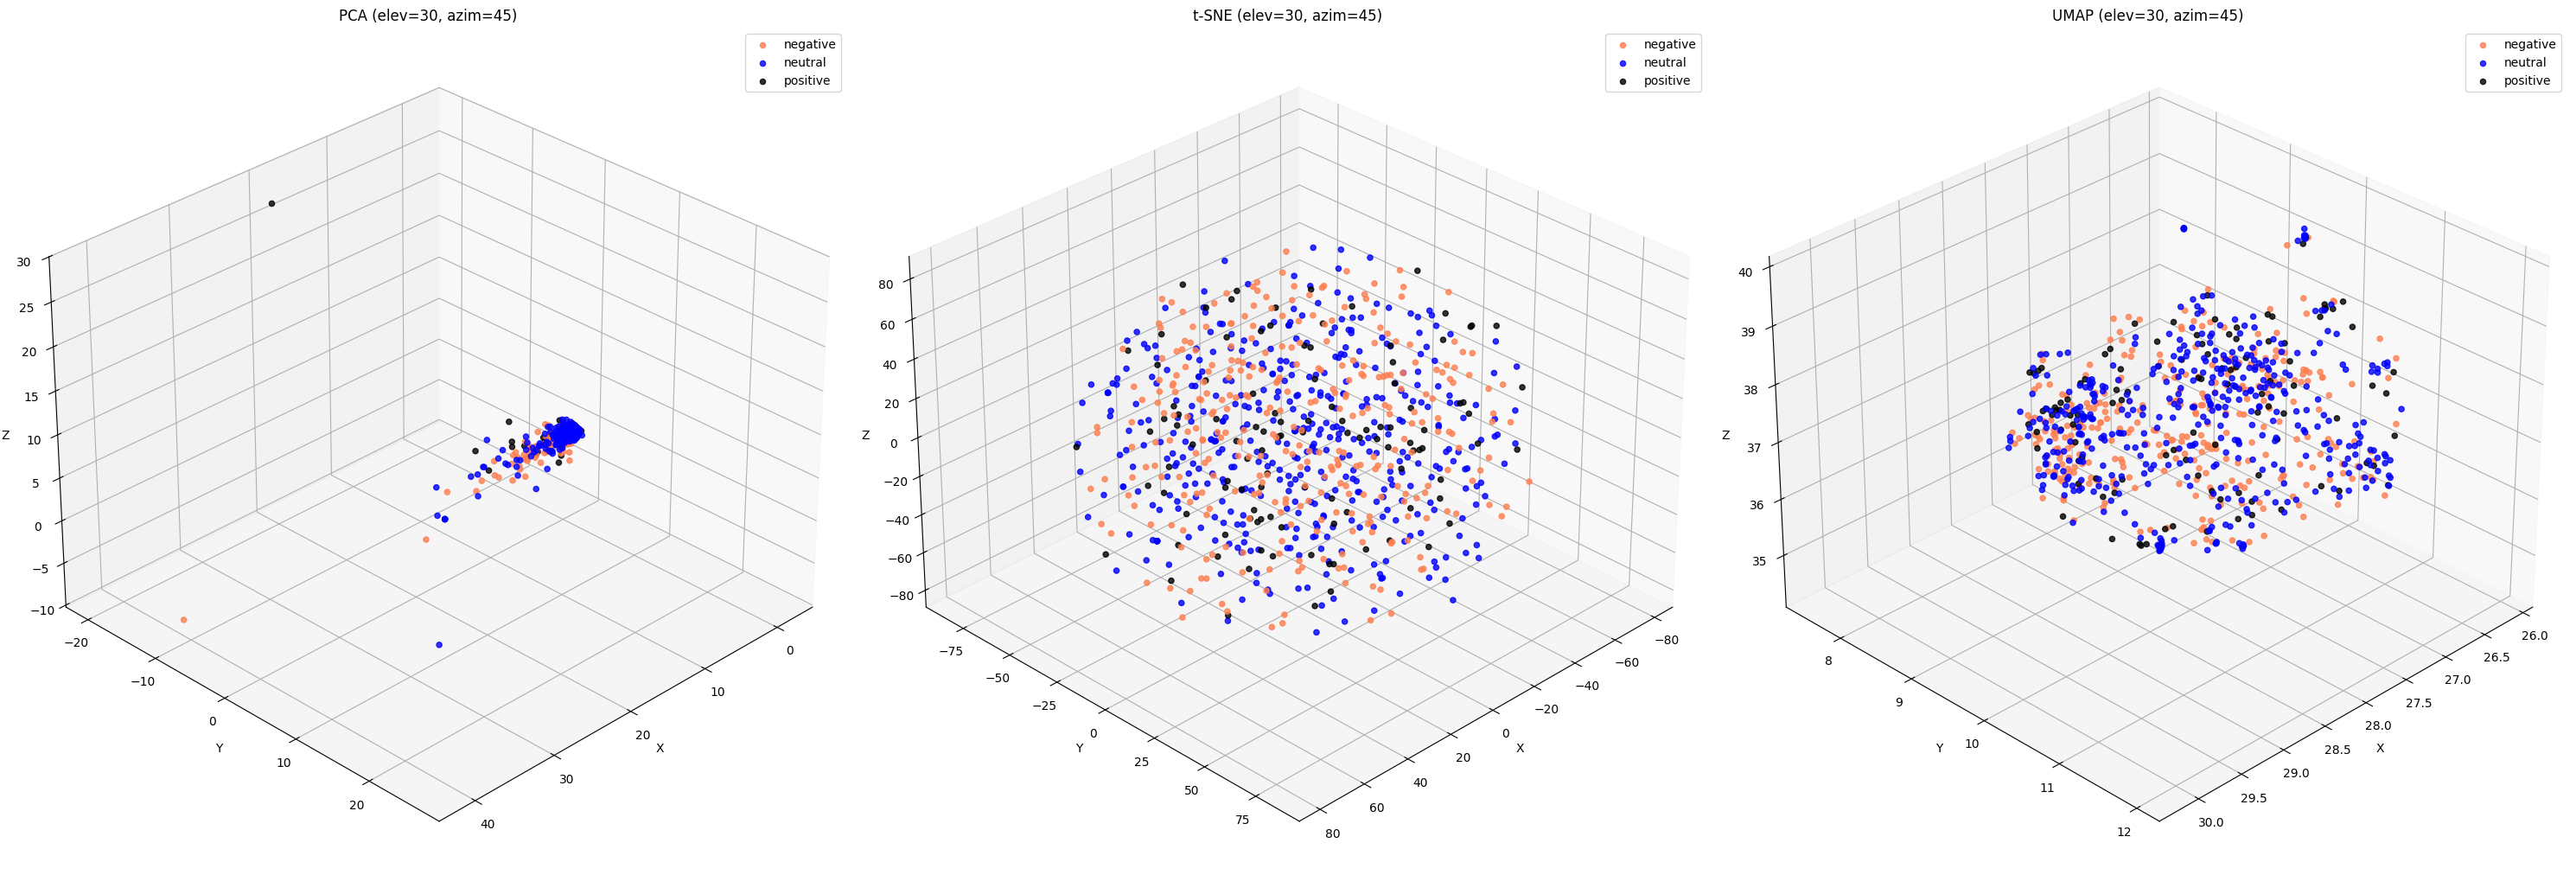

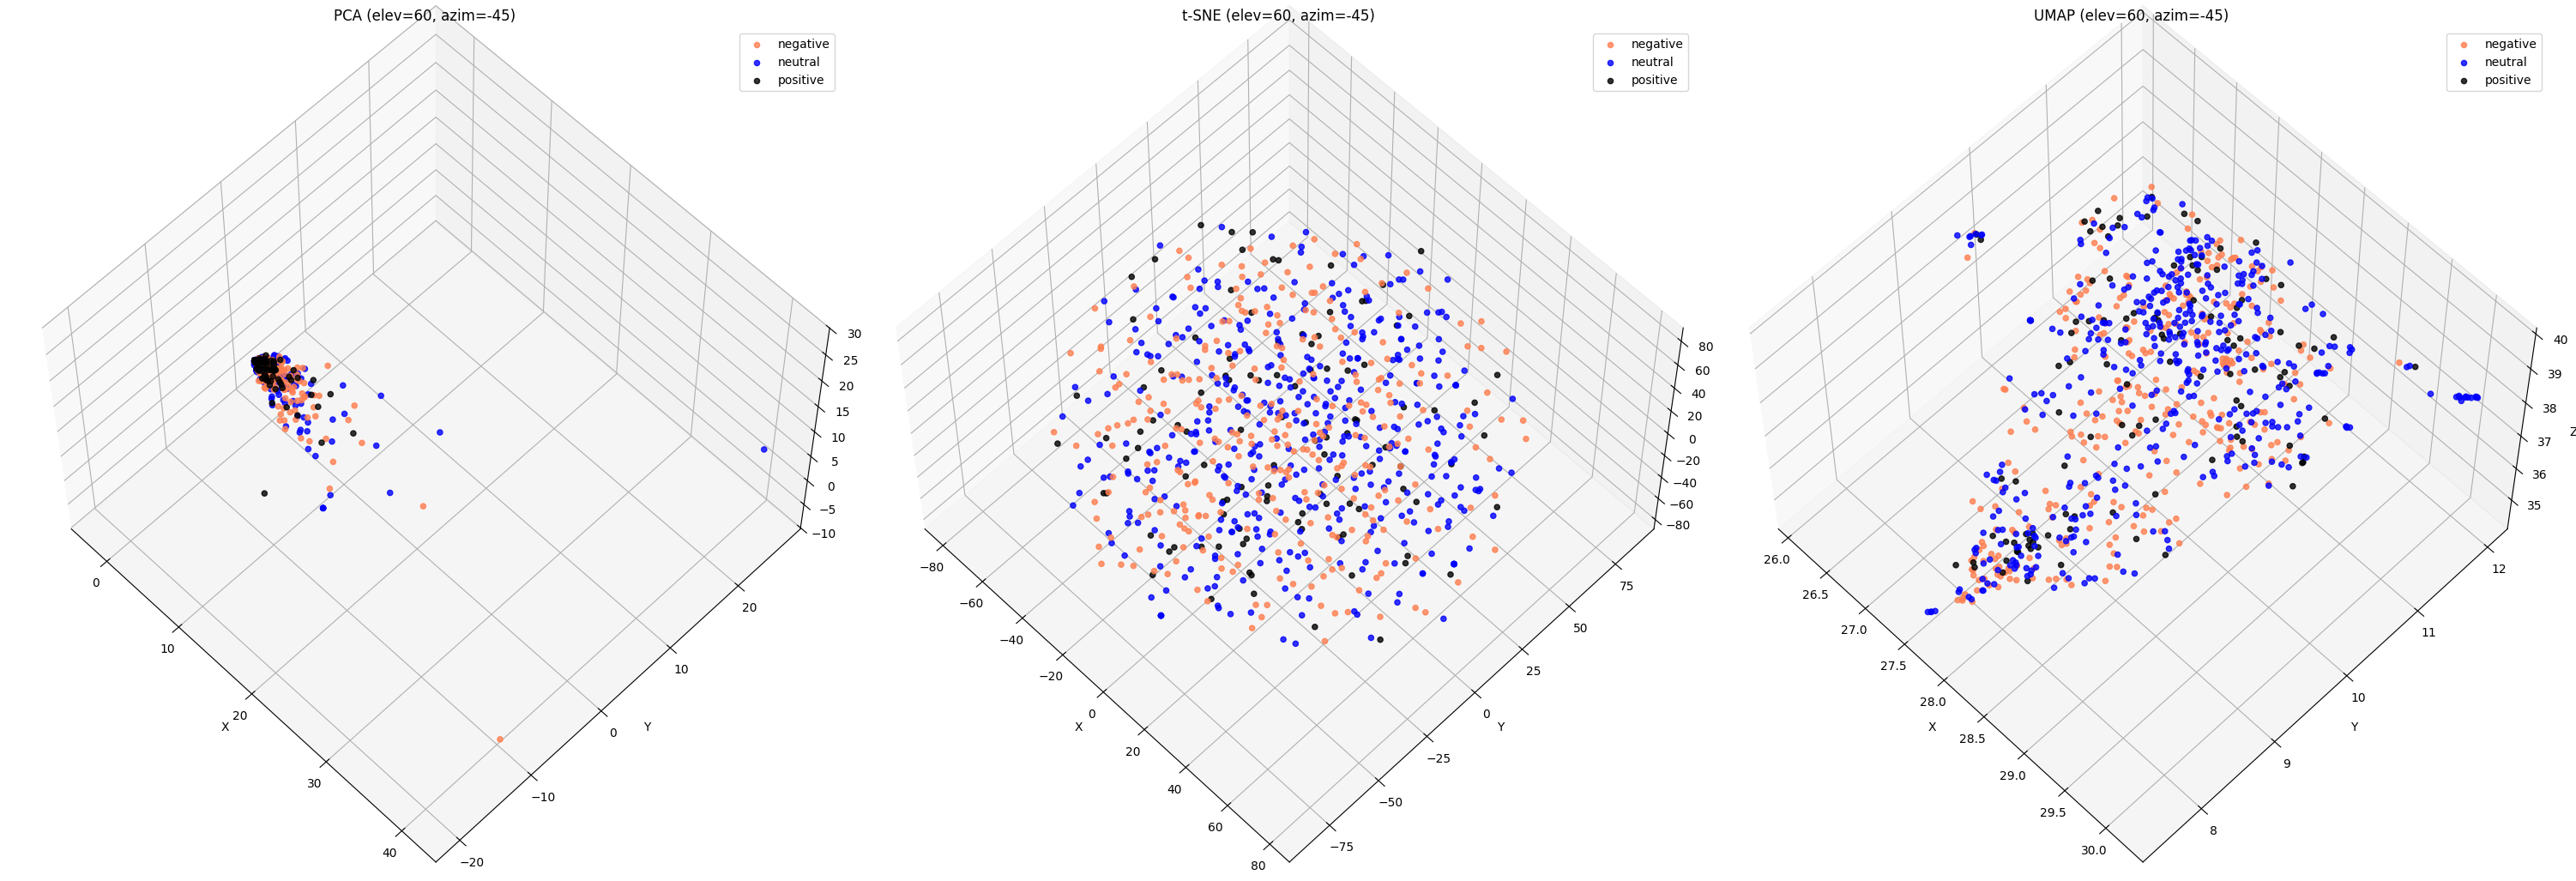

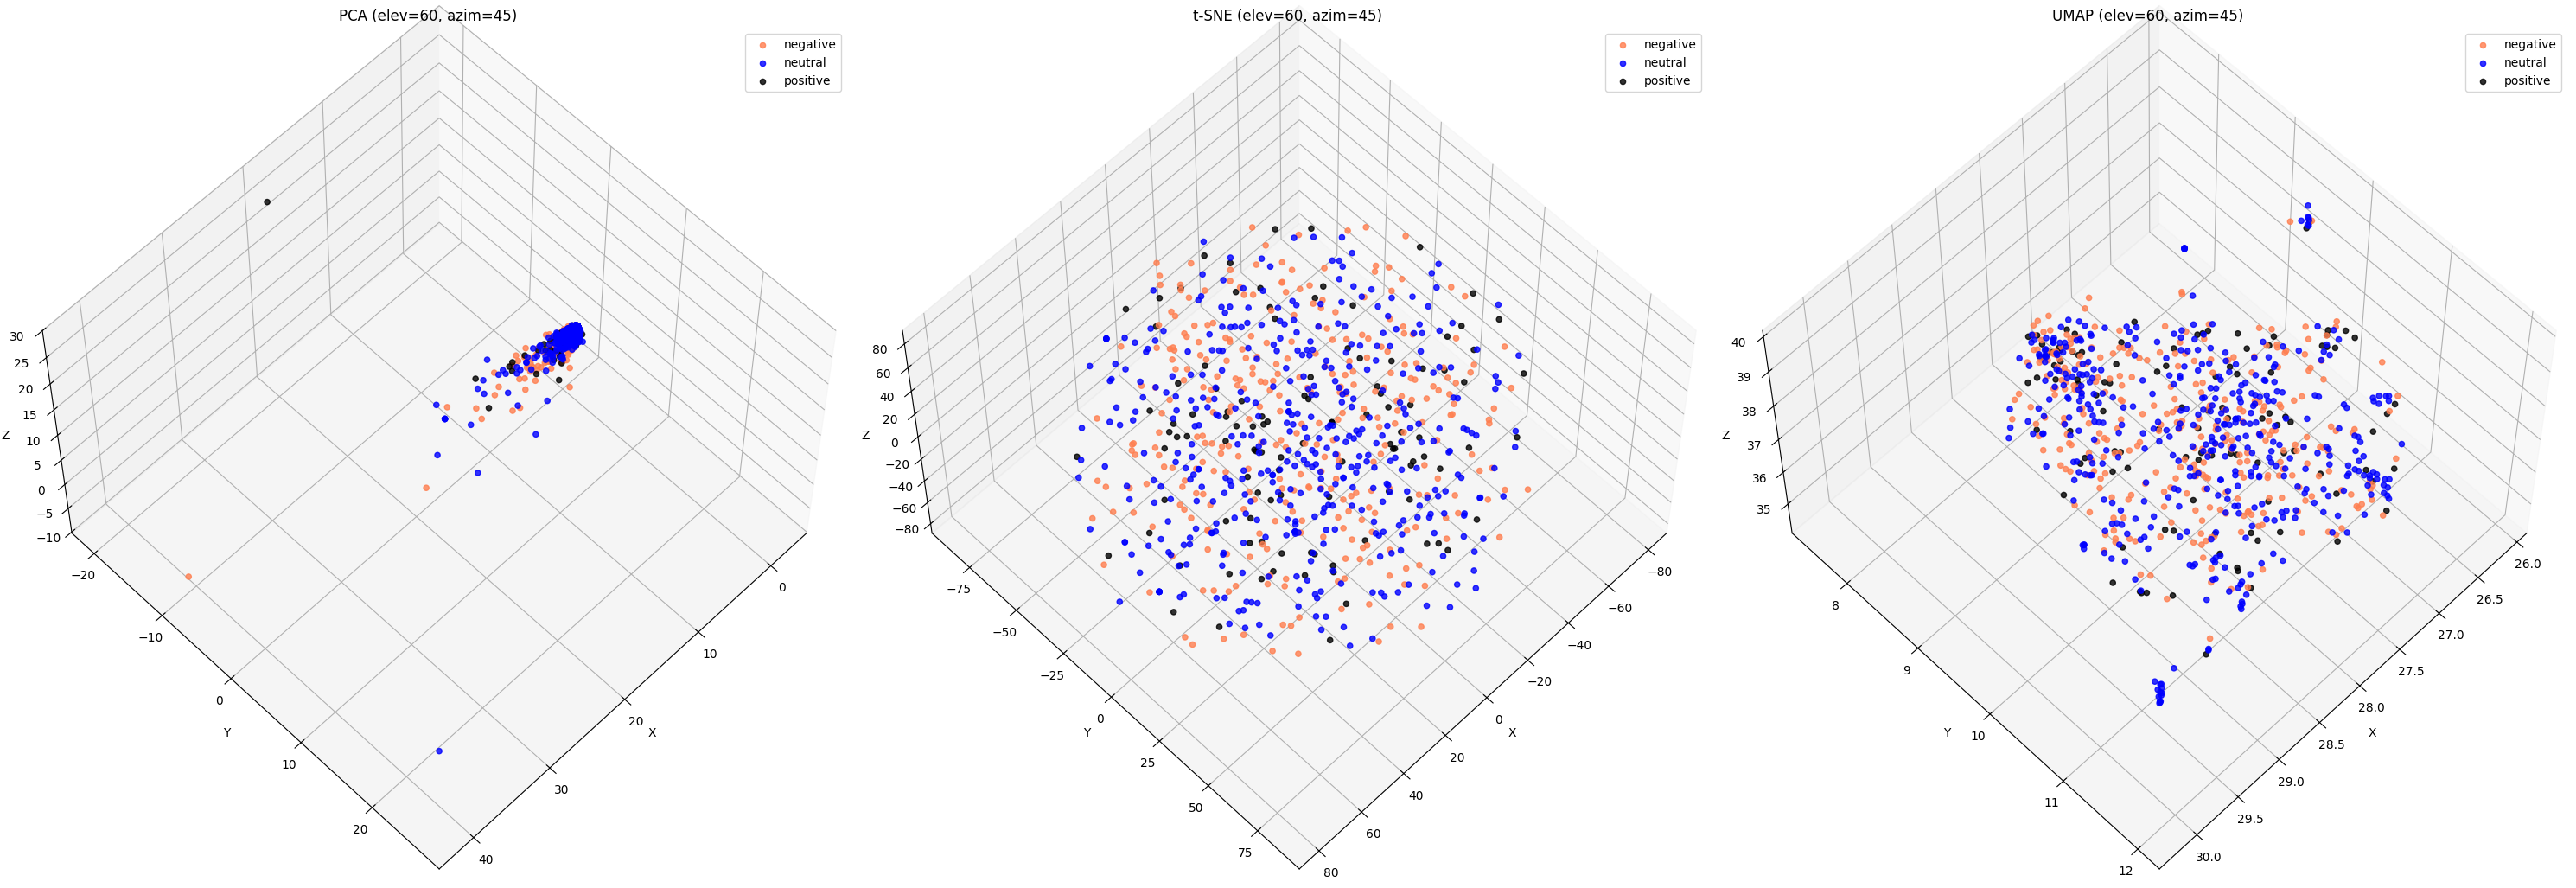

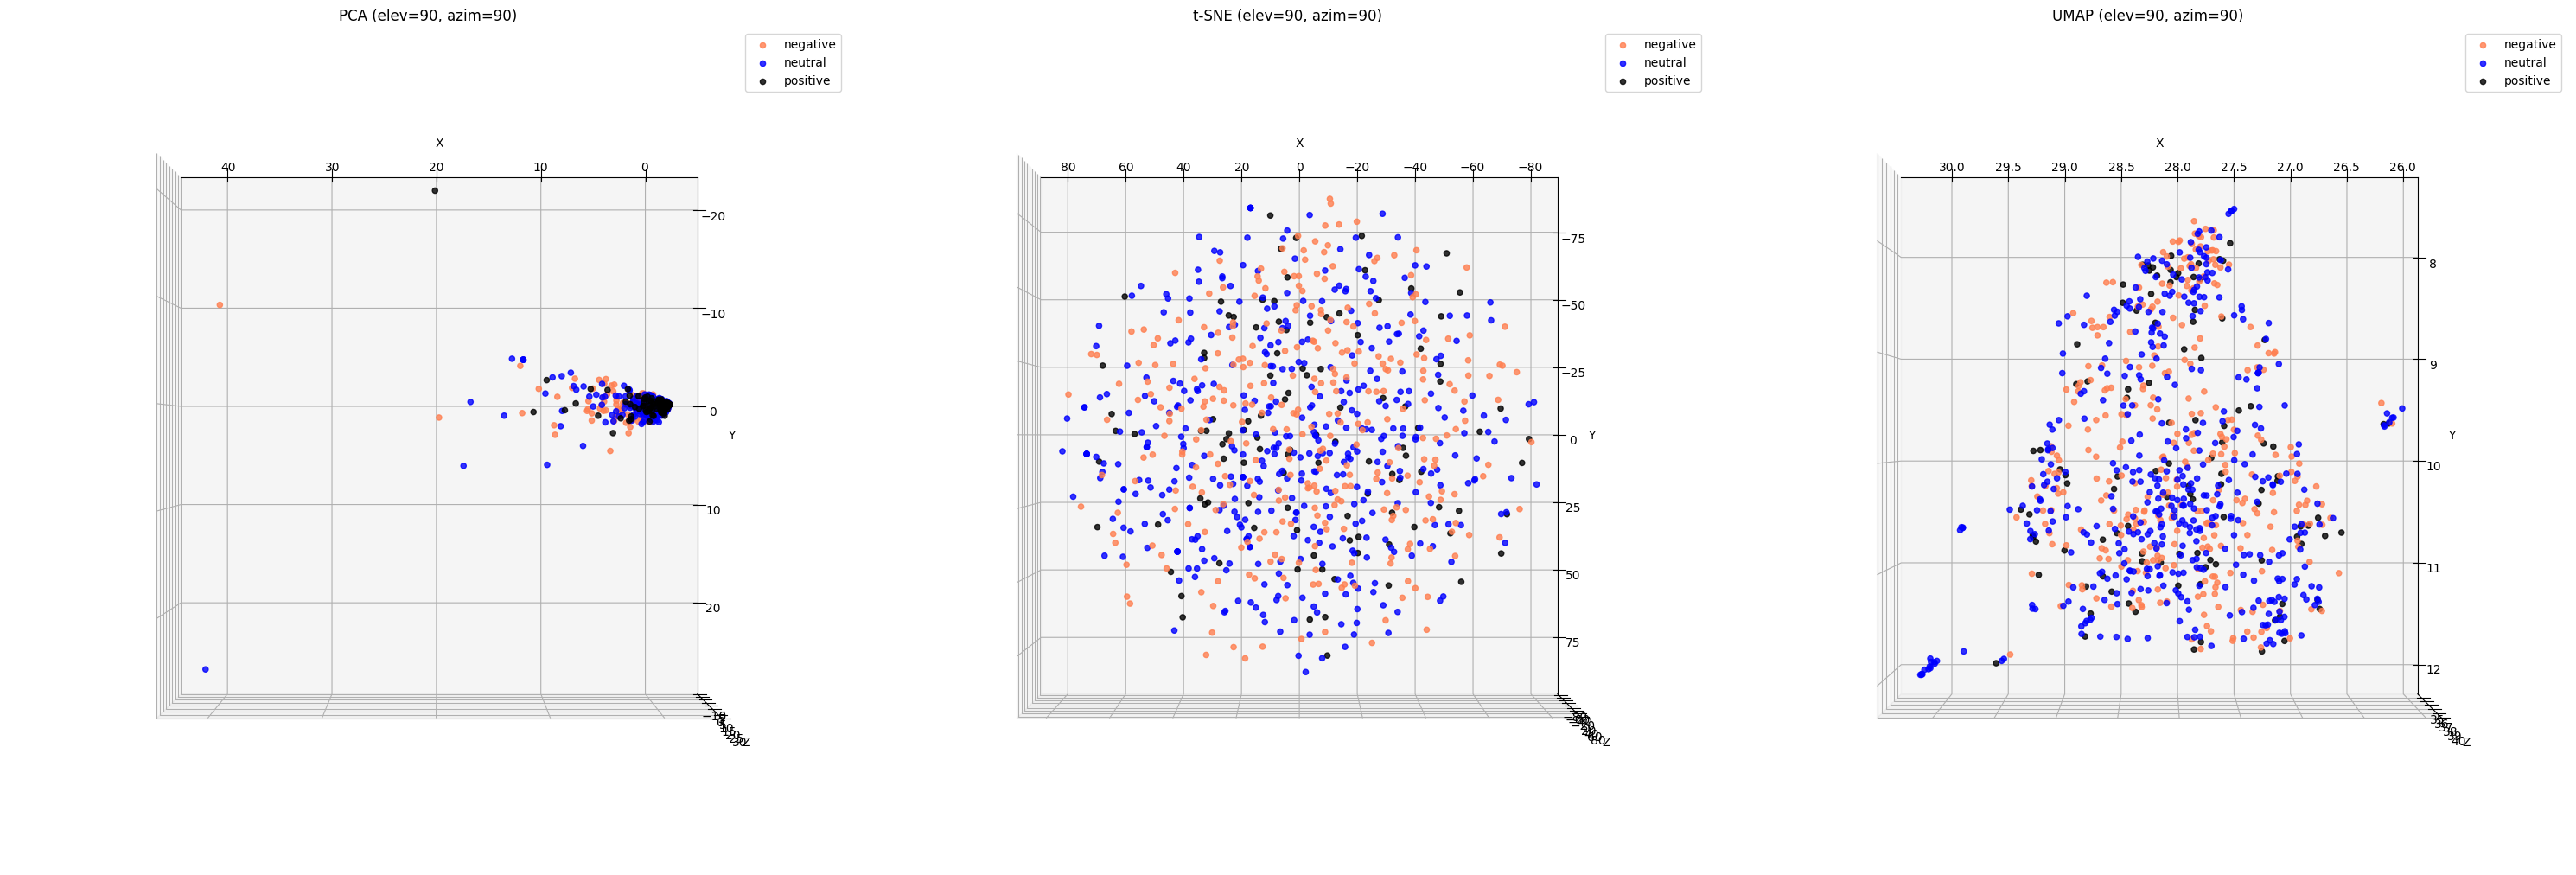

In [139]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, alpha = 0.8, c = c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')


angles = [(0, 0), (0, 90), (90, 0), (-90, 0), (0, -90), (30, -45), (30, 45), (60, -45), (60, 45), (90, 90)]
methods = [('PCA',  X_pca_tdm_3), ('t-SNE', X_tsne_tdm_3), ('UMAP', X_umap_tdm_3)]

for elev, azim in angles:
    fig = plt.figure(figsize=(30, 10))
    axes = [fig.add_subplot(1, 3, k+1, projection='3d') for k in range(3)]
    for ax, (title, Xr) in zip(axes, methods):
        plot_scatter(ax, Xr, f'{title} (elev={elev}, azim={azim})')
        ax.view_init(elev=elev, azim=azim)
    plt.tight_layout()
    plt.show()

In [ ]:
# Similar to master, points in PCA are more clustered together, while in t-SNE and UMAP, points are more spread out.
# Data points in PCA are more clustered together because the dataset is non-linear. 
#In t-SNE and UMAP, data points are more spread out, but the points with same category are not that close to each other.

#### 5.6 Discretization and Binarization

In [141]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [142]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer()

In [143]:
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

text  category category_name  \
0                                   Calls on retards        -1      negative   
1  Stunt as in like why did they even make a big ...         0       neutral   
2                  Seeing lots of red in the ticker.         0       neutral   
3  Vision Marine Technologies Inc. is rewriting t...         1      positive   
4                           He didn’t say thank you.        -1      negative   
5  Hoping to ejaculate in wet warm puss tonight, ...         0       neutral   
6  Trump will respond to china increasing their t...        -1      negative   
7  Confirmed not a trap. Its been like this for p...         0       neutral   
8  Am I the only one seeing the cup & handle brea...         1      positive   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   
3  [Vision, Marine, Technologies, Inc., is, rewri...   
4               [He, didn, ’, t, say, thank, you, .]   
5  [Hoping, to, ejaculate, in, wet, warm, puss, t...   
6  [Trump, will, respond, to, china, increasing, ...   
7  [Confirmed, not, a, trap, ., Its, been, like, ...   
8  [Am, I, the, only, one, seeing, the, cup, &, h...   

                                      tokenized_text bin_category  
0                               {retards, on, Calls}    [1, 0, 0]  
1  {in, about, make, first, ever., should, as, a,...    [0, 1, 0]  
2          {in, the, Seeing, red, ticker., lots, of}    [0, 1, 0]  
3  {in, [](), Their, has, Octillion, Power, of, S...    [0, 0, 1]  
4                     {thank, He, didn’t, you., say}    [1, 0, 0]  
5  {in, warm, wet, ejaculate, me, wish, tonight,,...    [0, 1, 0]  
6  {JPow, if, reporting, LOT, next, Powell., down...    [1, 0, 0]  
7  {word, not, we, been, Its, probably, of, have,...    [0, 1, 0]  
8  {Day?, only, Thursday., one, new, base, high?,...    [0, 0, 1]

### >>> ex 19

In [144]:
mlb.fit(X.category_name)

LabelBinarizer()

In [145]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category category_name  \
0                                   Calls on retards        -1      negative   
1  Stunt as in like why did they even make a big ...         0       neutral   
2                  Seeing lots of red in the ticker.         0       neutral   
3  Vision Marine Technologies Inc. is rewriting t...         1      positive   
4                           He didn’t say thank you.        -1      negative   
5  Hoping to ejaculate in wet warm puss tonight, ...         0       neutral   
6  Trump will respond to china increasing their t...        -1      negative   
7  Confirmed not a trap. Its been like this for p...         0       neutral   
8  Am I the only one seeing the cup & handle brea...         1      positive   

                                            unigrams  \
0                               [Calls, on, retards]   
1  [Stunt, as, in, like, why, did, they, even, ma...   
2        [Seeing, lots, of, red, in, the, ticker, .]   
3  [Vision, Marine, Technologies, Inc., is, rewri...   
4               [He, didn, ’, t, say, thank, you, .]   
5  [Hoping, to, ejaculate, in, wet, warm, puss, t...   
6  [Trump, will, respond, to, china, increasing, ...   
7  [Confirmed, not, a, trap, ., Its, been, like, ...   
8  [Am, I, the, only, one, seeing, the, cup, &, h...   

                                      tokenized_text bin_category  \
0                               {retards, on, Calls}    [1, 0, 0]   
1  {in, about, make, first, ever., should, as, a,...    [0, 1, 0]   
2          {in, the, Seeing, red, ticker., lots, of}    [0, 1, 0]   
3  {in, [](), Their, has, Octillion, Power, of, S...    [0, 0, 1]   
4                     {thank, He, didn’t, you., say}    [1, 0, 0]   
5  {in, warm, wet, ejaculate, me, wish, tonight,,...    [0, 1, 0]   
6  {JPow, if, reporting, LOT, next, Powell., down...    [1, 0, 0]   
7  {word, not, we, been, Its, probably, of, have,...    [0, 1, 0]   
8  {Day?, only, Thursday., one, new, base, high?,...    [0, 0, 1]   

  bin_category_name  
0         [1, 0, 0]  
1         [0, 1, 0]  
2         [0, 1, 0]  
3         [0, 0, 1]  
4         [1, 0, 0]  
5         [0, 1, 0]  
6         [1, 0, 0]  
7         [0, 1, 0]  
8         [0, 0, 1]

## 6. data exploration

In [146]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[8]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[34]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[56]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [147]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Am I the only one seeing the cup & handle breakout here? 52 week high? Third Green Day? The pivot was on Thursday. Perfectly held the base trend line to a new high. Follow the technicals folks.']
['So they went from saying redditors are bad for manipulating the market o praising silver??']
['To be fair, Chinese exports to the US make up a much larger portion of China’s GDP than the other way around. China kinda does rely on the US consumer to a degree.']


In [148]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [149]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.178571
Cosine Similarity using count bw 1 and 3: 0.370349
Cosine Similarity using count bw 2 and 3: 0.116952
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:17: Dep

### >>> ex 20

In [150]:
#Answer
document_to_transform_1 = []
random_record_1 = X.iloc[23]
print(random_record_1['category_name'])
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[35]
print(random_record_2['category_name'])
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[72]
print(random_record_3['category_name'])
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

negative
neutral
neutral


In [151]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['I feel like these HFs took the word "retard" thrown around at WSB too literally. Now they are trying to pack shit in Tiffany bags and sell it to us. But we ain\'t buying it!']
['Goshdang about time. It was fine to say when I was a kid, fine in college, but then I went to war and when I come back the whole world got suuuuuper weird. 2012 was a pretty important year to miss or something?']
["A lot of stocks are down right now, and I'm thinking of spending 250 on the below tmmw. Thoughts (some are partial cuz im using robinhood)?  Reddit - $60  Nvidia - $70  KULR - $40  ICU - $40  BLGO or OPTT - $40  If you think this is a bad idea or have any advice, lmk why and if I should invest in something else like some crypto. Since this is my first time investing and I'm kinda young, I don't want to put too much money in. Should I put double and spend $500, or start with $250 and see how I do from there?"]


In [152]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [153]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.264906
Cosine Similarity using count bw 1 and 3: 0.202076
Cosine Similarity using count bw 2 and 3: 0.180817
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_87715/452772485.py:17: Dep

In [ ]:
# All of these consine values are low, even between the same document.
# The possible reason is that these three documents are short and contain very few words in common.

## 7. Data Classification

In [155]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [156]:
X_test

00  000  01378  02  027  03  06  08  10  100  ...  yours  yourself  \
457   0    0      0   0    0   0   0   0   0    0  ...      0         0   
342   0    0      0   0    0   0   0   0   0    0  ...      0         0   
280   0    0      0   0    0   0   0   0   0    0  ...      0         0   
275   0    0      0   0    0   0   0   0   0    0  ...      0         1   
843   0    0      0   0    0   0   0   0   0    0  ...      0         0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...    ...       ...   
766   0    0      0   0    0   0   0   0   0    0  ...      0         0   
548   0    0      0   0    0   0   0   0   0    0  ...      0         0   
351   0    0      0   0    0   0   0   1   0    0  ...      0         0   
136   0    0      0   0    0   0   0   0   0    0  ...      0         0   
834   0    0      0   0    0   0   0   0   0    0  ...      0         0   

     yourselves  youtube  yoyo  yup  zero  zgld  zone  zsil  
457           0        0     0    0     0     0     0     0  
342           0        0     0    0     0     0     0     0  
280           0        0     0    0     0     0     0     0  
275           0        0     0    0     0     0     0     0  
843           0        0     0    0     0     0     0     0  
..          ...      ...   ...  ...   ...   ...   ...   ...  
766           0        0     0    0     0     0     0     0  
548           0        0     0    0     0     0     0     0  
351           0        0     0    0     0     0     0     0  
136           0        0     0    0     0     0     0     0  
834           0        0     0    0     0     0     0     0  

[255 rows x 4346 columns]

In [157]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.5854    0.7347    0.6516        98
     neutral     0.6393    0.6446    0.6420       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



### >>> ex 21
Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [158]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [159]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    negative     0.5950    0.7347    0.6575        98
     neutral     0.6371    0.6529    0.6449       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5961       255
   macro avg     0.4440    0.4718    0.4486       255
weighted avg     0.5451    0.5961    0.5648       255



### >>> ex 22
What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [160]:
# compare with original TDM, the accuracy of the augmente TDM is 59.6%, a little higher than the original TDM accuracy of 59.6%, 
# most of the precision, recall, and F1-score for each category were particularly same.
# the accuracy is much lower than expected, possible reason is that some santences are too short and contain very few words, making it difficult for classifier to make accurate predictions.

####  Decision Tree Classifier

In [161]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.49019607843137253

Classification Report:
               precision    recall  f1-score   support

    negative     0.4878    0.4082    0.4444        98
     neutral     0.5294    0.6694    0.5912       121
    positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669    0.4902    0.4715       255



### >>> ex 23
Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [ ]:
#Answer
# The accuracy of decision tree was about 49%, lower than the Naive Bayes model which was about 59%.
# With high-dimensional and sparse features dataset, decision trees can be prone to overfitting, 
# Due to these reasons, the model was unstable, leading to lower accuracy. 
# Additionally, compare to the dataset in lab1-master, the difference of accuracy here is lower, possibly because the dataset here is smaller and the sentences are shorter.

### >>> ex 24
Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [163]:
#Answer
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.48627450980392156

Classification Report:
               precision    recall  f1-score   support

    negative     0.4815    0.3980    0.4358        98
     neutral     0.5063    0.6612    0.5735       121
    positive     0.3125    0.1389    0.1923        36

    accuracy                         0.4863       255
   macro avg     0.4334    0.3993    0.4005       255
weighted avg     0.4694    0.4863    0.4667       255



In [ ]:
# Compare with original TDM, the accuracy of the augmented TDM using decision tree is 48.6%, slightly lower than the original TDM accuracy.
# Also the precision, recall, and F1-score for each category were very similar.
# The result is different from expected, possible reason is that this dataset is small and some sentences are short.

### >>> ex 25
In your opinion, how should one choose the best model for a given task, such as the classification example above?

In [ ]:
#Answer
# To determine which model will be better suited for a classification task, 

# 1. Understand the data characteristics, such as size, dimensionality, sparsity, linearity. 
# For the database used here, the size is small so it is easy to overfit, decision tree is not suitable.
# Also the small dataset is not suitable for complex models, or the training will be undstable.

# 2. Consider the model complexity and interpretability, depending on the application requirements.

# 3. For small datasets, before applyinf models, consider using freature engineering techniques to enhance the data representation, such as TF-IDF
# Also consider using cross-validation to assess model performance and stability.

## Third: attempt the following tasks on the new dataset

## generate TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [181]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB

In [209]:
# TF-IDF features
vectorizer = TfidfVectorizer()
X_tdm_vec = vectorizer.fit_transform(X['text'])
tfidf_tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

tfidf_augmented_df = pd.concat([tfidf_tdm_df, pattern_matrix], axis=1)

In [210]:
# ComplementNB
X_train, X_test, y_train, y_test = train_test_split(tfidf_tdm_df, X['category'], test_size=0.3, random_state=42)

comp_nb_classifier = ComplementNB()
comp_nb_classifier.fit(X_train, y_train)
y_pred = comp_nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5058823529411764

Classification Report:
               precision    recall  f1-score   support

    negative     0.5338    0.7245    0.6147        98
     neutral     0.6543    0.4380    0.5248       121
    positive     0.1220    0.1389    0.1299        36

    accuracy                         0.5059       255
   macro avg     0.4367    0.4338    0.4231       255
weighted avg     0.5329    0.5059    0.5036       255



In [211]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_augmented_df, X['category'], test_size=0.3, random_state=42)

comp_nb_classifier = ComplementNB()
comp_nb_classifier.fit(X_train, y_train)
y_pred = comp_nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5098039215686274

Classification Report:
               precision    recall  f1-score   support

    negative     0.5338    0.7245    0.6147        98
     neutral     0.6667    0.4463    0.5347       121
    positive     0.1220    0.1389    0.1299        36

    accuracy                         0.5098       255
   macro avg     0.4408    0.4366    0.4264       255
weighted avg     0.5387    0.5098    0.5083       255



In [212]:
# count freq freature
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

countV = CountVectorizer()
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.592156862745098

Classification Report:
               precision    recall  f1-score   support

    negative     0.5854    0.7347    0.6516        98
     neutral     0.6393    0.6446    0.6420       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255



In [213]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

countV = CountVectorizer()
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.596078431372549

Classification Report:
               precision    recall  f1-score   support

    negative     0.5950    0.7347    0.6575        98
     neutral     0.6371    0.6529    0.6449       121
    positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5961       255
   macro avg     0.4440    0.4718    0.4486       255
weighted avg     0.5451    0.5961    0.5648       255



In [ ]:
# using TF-IDF accuracy = 0.506
# using TF-IDF and augmentation with feature pattern accuracy = 0.51
# using frequency feature accuracy = 0.592
# using frequency feature and augmentation with feature pattern accuracy = 0.596

In [ ]:
# The accuracy of using augmentation with feature pattern is higher than it doesn't use,
# also the accuracy of using TF-IDF is lower than using frequency feature.

# The possible reason is TF-IDF down-wight the words have high frequency, which remove impoertant signal in the dataset.
# With the small dataset, the words are not that much, after TF-IDF transformation,
# the model will have less information and can't classify the data well.
# Also, with small data, TF-IDF is more easily to be affectrd by noise.

## fourth: somethings that are not ideal or the most efficient/meaningful

In [ ]:
# 1. Do data processing. 
# There are a lot of the stop words in dataset, doing data processing e.g. remove stop words can observe the data easier.

# 2. Dataset class is imbalance
# The positive category has fewer smaples than the others, the recall in Classification Report was low 
# Also it is difficult to model to identify postitve examples.

# 3. Do freature engineering
# Use TF-IDF or n-gram features to capture more informative patterns.